# python 3.11

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

## ------------------------ Plotting parameter setup ------------------------
ratio_plot = 3  # Scaling factor for figure-related sizes. Using a larger figure ensures clarity even after conversion to bitmap.

figwidth =  8.5 * ratio_plot  # In centimeters, but the default unit is inches (1 inch = 2.54 cm)
fs = 8 * ratio_plot  # Minimum font size, used for axis labels (6~14pt)
lw = 0.4 * ratio_plot  # Axis line width (0.25~1.5pt)
lw2 = 0.75 * ratio_plot  # Curve line width
lw3 = 1 * ratio_plot  # Bold curve line width

grid_alpha = 0.5
# bar_width = 0.3

# DejaVu is shipped with Matplotlib and is thus guaranteed to be available
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'  # Normal font for math text
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['text.usetex'] = False

# # Reset to default font
# plt.rcParams['mathtext.fontset'] = 'dejavusans'  # This is the default math font for matplotlib. When using 'dejavusans', the following settings do not apply.
# # plt.rcParams['mathtext.rm'] = 'sans'
# # plt.rcParams['mathtext.it'] = 'sans:italic'
# # plt.rcParams['mathtext.bf'] = 'sans:bold'
# plt.rcParams['text.usetex'] = False

# Read Data 

## City-Scale Data

In [2]:
import pandas as pd
import numpy as np

# ------------------- Read area and capacuty data -------------------
# Corresponds to roof area, maximum facade area, and filtered facade area
area_df = pd.read_excel('City_statistic.xlsx', sheet_name='Key_information',
        usecols=[0, 3, 4, 5], index_col=[0])

# Capacity data contains data at different stages. 'Roof' is rooftop capacity, 'Ideal' is ideal facade capacity,
# and 'Facade' is cost-effective facade capacity. Unit: GW
# The numbers at the end represent different development stages, as PV cost and efficiency evolve,
# so 'Ideal' values differ by stage
cap_df = pd.read_excel('City_Cap.xlsx', index_col=[0])

# Convert DataFrame to numpy arrays
area_data = area_df.to_numpy()
cap_data = cap_df.to_numpy()

# ------------------- Population of selected cities -------------------
population_df = pd.read_excel('City_info.xlsx', sheet_name=0,
        usecols=list(np.arange(8)))  # The last column 'City' is the index of the cities in the study

population_df.set_index('City', inplace=True)

# Create a mapping for city scale
scale_mapping = {
    "II型大城市": 0,
    "I型大城市": 1,
    "特大城市": 2,
    "超大城市": 3
}

# Add a new column 'city_level'
population_df["city_level"] = population_df["规模等级"].map(scale_mapping)

# ------------------- Average building height data -------------------
# File path
file_path = 'City_statistic.xlsx'  # Path to the Excel file
# Read total building volume
building_volume_df = pd.read_excel(file_path, index_col=0)
total_building_volume = building_volume_df.iloc[:, 0].copy()
# Read total rooftop area of buildings
key_information = pd.read_excel(file_path, sheet_name=2, index_col=0)
total_building_area = key_information['Area_roof-0(km2)']
# Calculate average building height (m)
average_building_height = total_building_volume / total_building_area * 1000
average_building_height.name = 'average_building_height'

# ------------------- Read power curve data -------------------
# Read .npy files
file_path = '.'
ideal_facade_data_1_path=file_path+'\\Power_facade_ideal_1.npy'
ideal_facade_data_1 = np.sum((np.load(ideal_facade_data_1_path)),axis=1)/1e6

real_facade_data_1_path=file_path+'\\Power_facade_1.npy'
real_facade_data_1 = np.sum((np.load(real_facade_data_1_path)),axis=1)/1e6

roof_data_1_path = file_path+'\\Power_roof_1.npy'
roof_data_1 = np.sum(np.load(roof_data_1_path),axis=1)/1e6

# ------------------- City geographic and other information -------------------
cities_hku_dest = pd.read_hdf('cities_hku_dest.hdf', key='cities_hku_dest')

## City Mapping

Establish the correspondence between the GeoDataFrame and the DataFrame based on city_adcode (administrative code).

Obtain city_adcode from fshp.get_cn_city_table(data_source='tianditu').

The mapping between the GeoDataFrame and the DataFrame has been completed, and the result can be directly loaded.

In [3]:
import pandas as pd
import os

# Specify the file path
file_path = "City_adcode.xlsx"

# Ensure the file exists
if os.path.exists(file_path):
    # Read the Excel data
    city_adcode_df = pd.read_excel(file_path, engine='openpyxl', index_col=0)
    print("Data loaded successfully!")
    print(city_adcode_df.head())  # Display the first few rows of the data
else:
    print(f"The file {file_path} does not exist. Please check if the path is correct.")

Data loaded successfully!
          ct_prefix  ct_adcode city_prefix  city_adcode
City                                                   
Anshan           鞍山     210300          鞍山       210300
Baotou           包头     150200          包头       150200
Baoding          保定     130600          保定       130600
Beijing          北京     110100          北京       110000
Changzhou        常州     320400          常州       320400


## Cell-Scale Data

In [4]:
import os
import numpy as np
import pandas as pd

# Specify the path to store the result HDF file
result_folder = r'.'
if not os.path.exists(result_folder):
    os.makedirs(result_folder)
hdf_file = os.path.join(result_folder, 'Power_roof_ideal_1_sum_all_df.h5')

# If the HDF file already exists, read the data directly; otherwise, perform data processing and save the result
Power_roof_ideal_1_sum_all_df = pd.read_hdf(hdf_file, key='df')
print("Data read from the HDF file.")

Power_roof_ideal_1_sum_all_df

Data read from the HDF file.


Power_roof_1_sum
city   grid_number                  
Anshan 0                 1545.976080
       1                 1001.273337
       2                 1905.609247
       3                  434.387122
       4                15139.993135
...                              ...
Zunyi  6998                56.564990
       6999                22.986841
       7000                70.822520
       7001                20.861937
       7002               163.264602

[316925 rows x 1 columns]

In [6]:
import os
import numpy as np
import pandas as pd

# Specify the path to store the result HDF file
result_folder = r'.'
if not os.path.exists(result_folder):
    os.makedirs(result_folder)
hdf_file = os.path.join(result_folder, 'Power_facade_ideal_1_sum_all_df.h5')

# If the HDF file already exists, read the data directly; otherwise, perform data processing and save the result
Power_facade_ideal_1_sum_all_df = pd.read_hdf(hdf_file, key='df')
print("Data read from the HDF file.")

Power_facade_ideal_1_sum_all_df

Data read from the HDF file.


Power_facade_ideal_1_sum
city   grid_number                          
Anshan 0                         2174.237367
       1                          680.913042
       2                          729.172557
       3                        13433.397192
       4                         5302.871962
...                                      ...
Zunyi  4796                        25.521109
       4797                       767.267665
       4798                       413.498715
       4799                       189.134944
       4800                       197.682500

[236555 rows x 1 columns]

In [11]:
## Grid_wea contains three columns: 'Global', 'Diff', and 'Direct'

import os
import numpy as np
import pandas as pd

# Specify the path to store the result HDF file
result_folder = r'.'
if not os.path.exists(result_folder):
    os.makedirs(result_folder)
hdf_file = os.path.join(result_folder, 'Grid_feas_wea_all_df.h5')

# If the HDF file already exists, read the data directly; otherwise, perform data processing and save the result
Grid_feas_wea_all_df = pd.read_hdf(hdf_file, key='df')
print("Data read from the HDF file.")

# Use the mean value of all grids as the city's solar radiation characteristic
solar_df = Grid_feas_wea_all_df.groupby(level=0).mean()/1000  # kWh/m²

Grid_feas_wea_all_df

Data read from the HDF file.


Global       Diff      Direct
city   grid_number                                   
Anshan 0            1565263.23  637670.85  1817564.55
       1            1565184.22  642515.80  1810647.22
       2            1565263.23  637670.85  1817564.55
       3            1565263.23  637670.85  1817564.55
       4            1565263.23  637670.85  1817564.55
...                        ...        ...         ...
Zunyi  4796         1125850.01  699913.47   716731.87
       4797         1105421.31  688084.54   705832.38
       4798         1125850.01  699913.47   716731.87
       4799         1125850.01  699913.47   716731.87
       4800         1125850.01  699913.47   716731.87

[236555 rows x 3 columns]

# Fig. 2. Facade Area and Power Generation

## Data Preparation

In [13]:
import numpy as np
import pandas as pd

# Merge area data and annual power generation data
df_plot = area_df.iloc[:, :2].copy()  # km^2

roof_power = roof_data_1  # TWh
facade_power = ideal_facade_data_1  # TWh
df_plot['roof_power'] = roof_power
df_plot['facade_power'] = facade_power

# Merge average building height data
df_plot = df_plot.merge(average_building_height, left_index=True, right_index=True)

# Calculate the ratio of facade to roof in terms of area and power generation
df_plot['facade_roof_ratio_area'] = df_plot['Area_facade-0(km2)'] / df_plot['Area_roof-0(km2)']
df_plot['facade_roof_ratio_generation'] = df_plot['facade_power'] / df_plot['roof_power']

# Add 'city_adcode' column
df_plot = df_plot.merge(city_adcode_df, left_index=True, right_index=True, how='left')

# Convert to int
df_plot['city_adcode'] = df_plot['city_adcode'].astype(int)

df_plot

,Area_roof-0(km2),Area_facade-0(km2),roof_power,facade_power,average_building_height,facade_roof_ratio_area,facade_roof_ratio_generation,ct_prefix,ct_adcode,city_prefix,city_adcode
Anshan,224.927169,427.829452,13.900037,10.842595,7.736781,1.902080,0.780041,鞍山,210300,鞍山,210300
Baotou,188.971008,379.906312,13.340495,9.823765,8.856795,2.010395,0.736387,包头,150200,包头,150200
Baoding,1190.067102,2211.180000,80.536021,44.907661,6.789533,1.858030,0.557610,保定,130600,保定,130600
Beijing,674.936604,1517.484620,44.249424,45.607126,10.218969,2.248337,1.030683,北京,110100,北京,110000
Changzhou,264.602426,485.948549,15.154687,13.876589,10.070088,1.836523,0.915663,常州,320400,常州,320400
...,...,...,...,...,...,...,...,...,...,...,...
Chongqing,1068.349128,1873.330000,44.259085,26.215900,7.806437,1.753481,0.592328,重庆,500200,重庆,500000
Zhuhai,67.280147,112.881912,4.251027,2.897614,8.775101,1.677789,0.681627,珠海,440400,珠海,440400
Zhuzhou,183.523757,306.954250,9.263919,5.422614,6.932758,1.672559,0.585348,株洲,430200,株洲,430200
Zibo,349.077138,495.790038,21.963887,10.502944,6.387719,1.420288,0.478191,淄博,370300,淄博,370300


In [14]:
# --------------------- Read and convert to geographic coordinate system (EPSG:4326) ---------------------
import geopandas as gpd
import pyproj
file_path_taiwan = '台湾矢量地图shp数据/'
taiwan = gpd.read_file(file_path_taiwan + '台湾省-市矢量shp.shp').to_crs(epsg=4326)

# Project the GeoDataFrame from WGS84 (EPSG:4326) to Azimuthal Equidistant projection,
# specifying the central longitude and latitude (105°E, 35°N)
proj_aeqd = (
    "+proj=aeqd "
    "+lat_0=35 "   # Central latitude
    "+lon_0=105 "  # Central longitude
    "+datum=WGS84 "
    "+units=m "
    "+no_defs "
)
aeqd_crs = pyproj.CRS.from_proj4(proj_aeqd)

# Convert to the Azimuthal Equidistant projection
taiwan_aeqd = taiwan.to_crs(aeqd_crs)

## Subfigure (a)

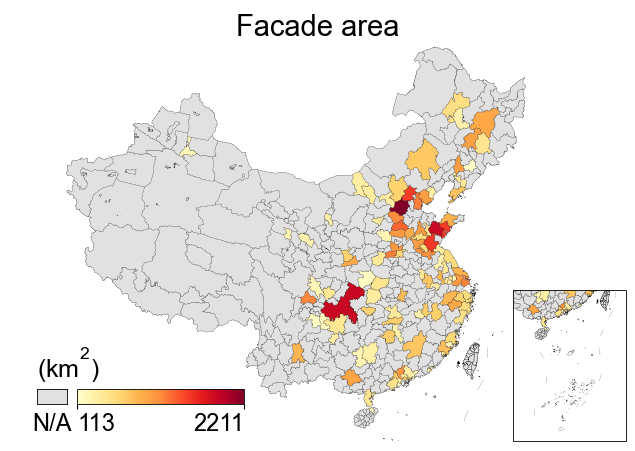

In [16]:
## Facade area
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

import frykit.plot as fplt
import frykit.shp as fshp

# Parameter settings
col_plot = "Area_facade-0(km2)"

cmap = plt.get_cmap('YlOrRd')
bad_color = '#E1E1E1'
cmap.set_bad(bad_color)

lw_cn_map = lw * 0.1
lw_axis = lw * 0.5

# Data preparation
city_table = fshp.get_cn_city_table(data_source='tianditu')  # Get metadata table for city boundaries
city_table_with_values = city_table.merge(df_plot, left_on='city_adcode', right_on='city_adcode', how='left')  # Merge by city_adcode

city_adcode = city_table_with_values['city_adcode'].astype(int)
cities = fshp.get_cn_city(city_adcode, data_source='tianditu')
data = city_table_with_values[col_plot]

vmin, vmax = data.min(), data.max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Set projection
map_crs = fplt.CN_AZIMUTHAL_EQUIDISTANT
data_crs = fplt.PLATE_CARREE

# Set ticks
xticks = np.arange(-180, 181, 10)
yticks = np.arange(-90, 91, 10)

# Prepare main map
font_options = {'family': 'Arial', 'size': fs}
plt.rc('font', **font_options)

fig = plt.figure(figsize=np.array([figwidth * 2/3, figwidth * 2/3 * 0.7]) / 2.54)
main_ax = fig.add_subplot(projection=map_crs)

fplt.set_map_ticks(main_ax, (74, 136, 17, 55), xticks, yticks)
# main_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')
main_ax.set_adjustable('datalim')
main_ax.set_xticks([])
main_ax.set_yticks([])
main_ax.axis('off')

# Prepare inset map
mini_ax = fplt.add_mini_axes(main_ax, shrink=0.35)
mini_ax.spines[:].set_linewidth(lw_axis)
mini_ax.set_extent((105, 122, 2, 25), data_crs)
# mini_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')

# Add map features
for ax in [main_ax, mini_ax]:
    fplt.add_cn_border(ax, lw=lw_cn_map, fc='none', zorder=-10)
    fplt.add_cn_line(ax, lw=lw_cn_map)

# Draw filled polygons
for ax in [main_ax, mini_ax]:
    fplt.add_geometries(
        ax, cities, array=data,
        cmap=cmap, norm=norm,
        ec='black', lw=lw_cn_map,
    )
    taiwan_aeqd.plot(
        ax=ax, color='none', edgecolor='black',
        linewidth=lw_cn_map,
        )

# Set title
main_ax.set_title(
    'Facade area',
    y=0.92,
    fontsize=fs-3,
    weight='normal',
)

# --------------------- Create colorbar ---------------------
# Main colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cax = fig.add_axes([0.08 + 0.06, 0.12, 0.25, 0.03])  # Add space on the left for the NaN color block
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_ticks(np.linspace(vmin, vmax, 2))
cbar.ax.tick_params(labelsize=fs - 7)
cbar.outline.set_visible(True)
cbar.outline.set_linewidth(lw_axis)

# Align tick labels: left-align min, right-align max
tick_labels = cbar.ax.get_xticklabels()
tick_labels[0].set_horizontalalignment('left')
tick_labels[-1].set_horizontalalignment('right')

# Add NaN gray block
na_cax = fig.add_axes([0.08, 0.12, 0.045, 0.03])  # Position of the NaN block (mini colorbar)
na_cax.set_facecolor(bad_color)
na_cax.set_xticks([])
na_cax.set_yticks([])
na_cax.spines[:].set_linewidth(lw_axis)
na_cax.text(0.5, -1.5, 'N/A', ha='center', va='center', fontsize=fs - 7, transform=na_cax.transAxes)

# Add unit label
main_ax.text(
    0.08, 0.12 + 0.03 + 0.01,  # Position: above the NaN color block
    '(km$^2$)',                # Unit text
    transform=fig.transFigure,
    ha='left', va='bottom', fontsize=fs - 6
)

# # Add subfigure label
# main_ax.text(0, 1, f'a', transform=main_ax.transAxes,
#             ha='left', va='top', fontsize=fs + 9, fontweight='bold')

# Adjust subplot layout
plt.subplots_adjust(left=0.04, right=0.96, bottom=0.04, top=0.96)

# Save figure
# plt.savefig(path_fig2+'fig2_(a)1_facade_area.png', dpi=500)

# Show figure
plt.show()

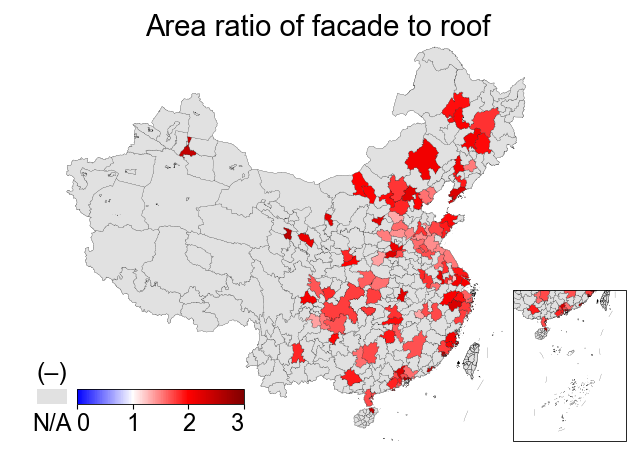

In [17]:
## Facade-to-roof ratio of area
import matplotlib.pyplot as plt
import numpy as np
from cartopy.feature import LAND
from scipy.ndimage import gaussian_filter
from matplotlib.cm import ScalarMappable

import frykit.plot as fplt
import frykit.shp as fshp

# Parameter settings
col_plot = "facade_roof_ratio_area"

cmap = plt.get_cmap('seismic')
cmap = mcolors.LinearSegmentedColormap.from_list(
    "truncated", cmap(np.linspace(1/4, 1, 256))  # Use only the latter part of the colormap
)
bad_color = '#E1E1E1'
cmap.set_bad(bad_color)

lw_cn_map = lw * 0.1
lw_axis = lw * 0.5

# Data preparation
city_table = fshp.get_cn_city_table(data_source='tianditu')  # Get metadata table for city boundaries
city_table_with_values = city_table.merge(df_plot, left_on='city_adcode', right_on='city_adcode', how='left')  # Merge by city_adcode

city_adcode = city_table_with_values['city_adcode'].astype(int)
cities = fshp.get_cn_city(city_adcode, data_source='tianditu')
data = city_table_with_values[col_plot]

vmin, vmax = data.min(), data.max()  # (1.25..., 2.76...)
norm = plt.Normalize(vmin=0, vmax=3)

# Set projection
map_crs = fplt.CN_AZIMUTHAL_EQUIDISTANT
data_crs = fplt.PLATE_CARREE

# Set ticks
xticks = np.arange(-180, 181, 10)
yticks = np.arange(-90, 91, 10)

# Prepare main map
font_options = {'family': 'Arial', 'size': fs}
plt.rc('font', **font_options)

fig = plt.figure(figsize=np.array([figwidth * 2/3, figwidth * 2/3 * 0.7]) / 2.54)
main_ax = fig.add_subplot(projection=map_crs)

fplt.set_map_ticks(main_ax, (74, 136, 17, 55), xticks, yticks)
# main_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')
main_ax.set_adjustable('datalim')  # Let the Axes automatically adjust xlim and ylim
main_ax.set_xticks([])
main_ax.set_yticks([])
main_ax.axis('off')

# Prepare inset map
mini_ax = fplt.add_mini_axes(main_ax, shrink=0.35)
mini_ax.spines[:].set_linewidth(lw_axis)
mini_ax.set_extent((105, 122, 2, 25), data_crs)
# mini_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')

# Add features
for ax in [main_ax, mini_ax]:
    fplt.add_cn_border(ax, lw=lw_cn_map, fc='none', zorder=-10)
    fplt.add_cn_line(ax, lw=lw_cn_map)

# Draw filled polygons
for ax in [main_ax, mini_ax]:
    fplt.add_geometries(
        ax, cities, array=data,
        cmap=cmap, norm=norm,
        ec='black', lw=lw_cn_map,
    )
    taiwan_aeqd.plot(
        ax=ax, color='none', edgecolor='black',
        linewidth=lw_cn_map,
        )

# Set title
main_ax.set_title(
    'Area ratio of facade to roof',
    y=0.92,
    fontsize=fs-3,
    weight='normal',
)

# --------------------- Create colorbar ---------------------
# Main colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cax = fig.add_axes([0.08 + 0.06, 0.12, 0.25, 0.03])  # Add space on the left for NaN color block
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_ticks(np.arange(0, 4, 1))  # Set 5 evenly spaced ticks, adjust as needed
cbar.ax.tick_params(labelsize=fs - 7)
cbar.outline.set_visible(True)
cbar.outline.set_linewidth(lw_axis)

# Align tick labels: left-align min, right-align max
tick_labels = cbar.ax.get_xticklabels()
tick_labels[0].set_horizontalalignment('left')
tick_labels[-1].set_horizontalalignment('right')

# Add NaN gray block
na_cax = fig.add_axes([0.08, 0.12, 0.045, 0.03])  # Position of the NaN block (mini colorbar)
na_cax.set_facecolor(bad_color)
na_cax.set_xticks([])
na_cax.set_yticks([])
na_cax.spines[:].set_visible(False)
na_cax.text(0.5, -1.5, 'N/A', ha='center', va='center', fontsize=fs - 7, transform=na_cax.transAxes)

# Add unit label
main_ax.text(
    0.08, 0.12 + 0.03 + 0.01,  # Position: above the NaN color block
    '(\u2013)',                # Unit text (dash)
    transform=fig.transFigure,
    ha='left', va='bottom', fontsize=fs - 6
)

# Adjust subplot layout
plt.subplots_adjust(left=0.04, right=0.96, bottom=0.04, top=0.96)

# Save figure
# plt.savefig(path_fig2+'fig2_(a)2_facade_to_roof_area_ratio.png', dpi=500)

# Show figure
plt.show()

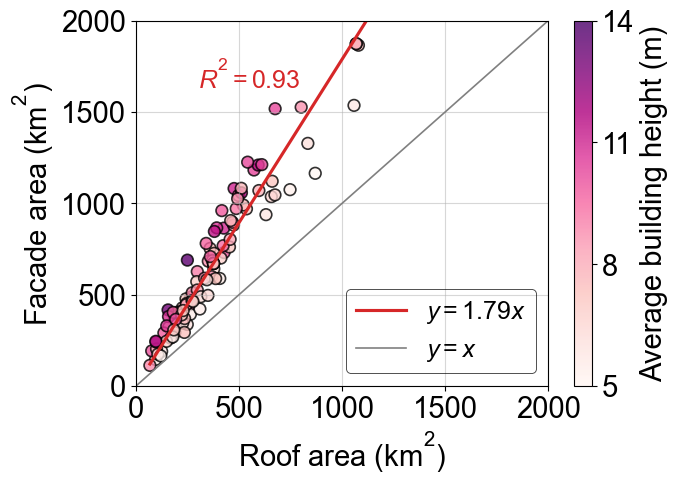

In [18]:
## Facade area vs Roof area
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Parameter settings
cmap = 'RdPu'
vmin, vmax = df_plot['average_building_height'].min(), df_plot['average_building_height'].max()  # (4.99..., 13.52...)
norm = plt.Normalize(vmin=5, vmax=14)

color_fit = '#d62728'

font_options = {'family': 'Arial', 'size': fs-3}
plt.rc('font', **font_options)

fig, ax = plt.subplots(figsize=np.array([figwidth * 2/3, figwidth * 2/3 * 0.7]) / 2.54)
# ax.spines[:].set_linewidth(lw)
# ax.tick_params(width=lw)  # Default: axes.linewidth and xtick.major.width are 0.8

# Scatter plot: the third variable controls the color
sc = ax.scatter(df_plot['Area_roof-0(km2)'], df_plot['Area_facade-0(km2)'],
    c=df_plot['average_building_height'], cmap=cmap, norm=norm,
    alpha=0.8, s=70, edgecolors='black', linewidths=lw)

# Plot fitted line
x = df_plot['Area_roof-0(km2)'].values.reshape(-1, 1)
y = df_plot['Area_facade-0(km2)'].values

model = LinearRegression(fit_intercept=False)
model.fit(x, y)
k = model.coef_[0]
R2 = model.score(x, y)

x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = k * x_fit
ax.plot(x_fit, y_fit, '-', color=color_fit, linewidth=lw2, 
        label=f'$y={k:.2f}x$')  #  R²={R2:.2f}
ax.text(
    0.4, 0.8,           # Position near the end of the fitted line
    f'$R^2={R2:.2f}$',  # Annotation text
    fontsize=fs - 6,
    color=color_fit,
    transform=ax.transAxes,
    ha='right', va='bottom',
)

# Set axis labels
ax.set_xlim(0, 2000)
ax.set_ylim(0, 2000)
ax.set_xlabel('Roof area (km$^2$)', fontsize=fs-3)
ax.set_ylabel('Facade area (km$^2$)', fontsize=fs-3)

# Add y = x reference line
x_limits = ax.get_xlim()
x_line = np.linspace(x_limits[0], x_limits[1], 100)
ax.plot(x_line, x_line, linestyle='-', color='gray', linewidth=lw, label='$y=x$')

# Add grid and legend
ax.grid(alpha=0.5)

lg = ax.legend(loc='best', fontsize=fs - 6)
frame = lg.get_frame()
frame.set_linewidth(0.6)
frame.set_edgecolor('black')
frame.set_facecolor('none')

# Add colorbar to display the third variable (average building height)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Average building height (m)', fontsize=fs - 3)
cbar.set_ticks(np.arange(5, 15, 3))  # 5 evenly spaced ticks, adjust if needed
cbar.ax.tick_params(labelsize=fs - 3)

# Adjust layout
plt.subplots_adjust(left=0.19, right=0.96, bottom=0.18, top=0.96)

# Save figure
# plt.savefig(path_fig2+'fig2_(a)3_facade_vs_roof_area.svg', dpi=500)

plt.show()

## Subfigure (b)

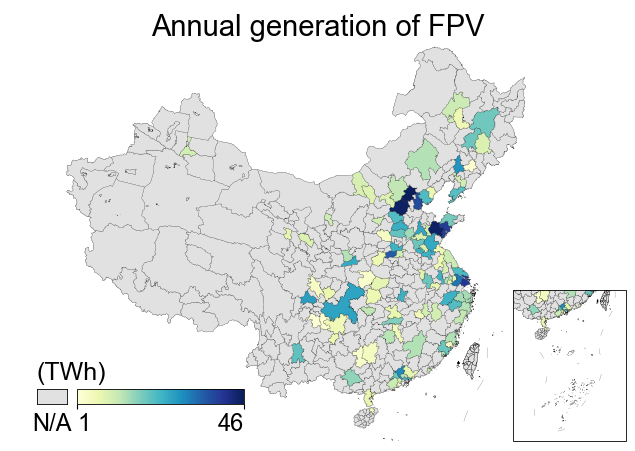

In [ ]:
## Facade generation
import matplotlib.pyplot as plt
import numpy as np
from cartopy.feature import LAND
from scipy.ndimage import gaussian_filter
from matplotlib.cm import ScalarMappable

import frykit.plot as fplt
import frykit.shp as fshp

# Parameter settings
col_plot = "facade_power"

cmap = plt.get_cmap('YlGnBu')
bad_color = '#E1E1E1'
cmap.set_bad(bad_color)

lw_cn_map = lw * 0.1
lw_axis = lw * 0.5

# Data preparation
city_table = fshp.get_cn_city_table(data_source='tianditu')  # Retrieve city boundary metadata
city_table_with_values = city_table.merge(df_plot, left_on='city_adcode', right_on='city_adcode', how='left')  # Merge by city_adcode

city_adcode = city_table_with_values['city_adcode'].astype(int)
cities = fshp.get_cn_city(city_adcode, data_source='tianditu')
data = city_table_with_values[col_plot]

vmin, vmax = np.floor(data.min() * 1) / 1, np.ceil(data.max() * 1) / 1
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Set map projection
map_crs = fplt.CN_AZIMUTHAL_EQUIDISTANT
data_crs = fplt.PLATE_CARREE

# Set tick marks
xticks = np.arange(-180, 181, 10)
yticks = np.arange(-90, 91, 10)

# Prepare main map
font_options = {'family': 'Arial', 'size': fs}
plt.rc('font', **font_options)

fig = plt.figure(figsize=np.array([figwidth * 2/3, figwidth * 2/3 * 0.7]) / 2.54)
main_ax = fig.add_subplot(projection=map_crs)

fplt.set_map_ticks(main_ax, (74, 136, 17, 55), xticks, yticks)
# main_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')
main_ax.set_adjustable('datalim')  # Adjust xlim and ylim to fit data
main_ax.set_xticks([])
main_ax.set_yticks([])
main_ax.axis('off')

# Prepare inset map
mini_ax = fplt.add_mini_axes(main_ax, shrink=0.35)
mini_ax.spines[:].set_linewidth(lw_axis)
mini_ax.set_extent((105, 122, 2, 25), data_crs)
# mini_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')

# Add map features
for ax in [main_ax, mini_ax]:
    fplt.add_cn_border(ax, lw=lw_cn_map, fc='none', zorder=-10)
    fplt.add_cn_line(ax, lw=lw_cn_map)

# Draw filled polygons
for ax in [main_ax, mini_ax]:
    fplt.add_geometries(
        ax, cities, array=data,
        cmap=cmap, norm=norm,
        ec='black', lw=lw_cn_map,
    )
    taiwan_aeqd.plot(
        ax=ax, color='none', edgecolor='black',
        linewidth=lw_cn_map,
        )

# Set title
main_ax.set_title(
    'Annual generation of FPV',
    y=0.92,
    fontsize=fs-3,
    weight='normal',
)

# --------------------- Create colorbar ---------------------
# Main colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cax = fig.add_axes([0.08 + 0.06, 0.12, 0.25, 0.03])  # Add space on the left for NaN block
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_ticks(np.linspace(vmin, vmax, 2))
cbar.ax.tick_params(labelsize=fs - 7)
cbar.outline.set_visible(True)
cbar.outline.set_linewidth(lw_axis)

# Align tick labels: left-aligned for min, right-aligned for max
tick_labels = cbar.ax.get_xticklabels()
tick_labels[0].set_horizontalalignment('left')
tick_labels[-1].set_horizontalalignment('right')

# Add NaN color block (gray)
na_cax = fig.add_axes([0.08, 0.12, 0.045, 0.03])  # Position of mini colorbar
na_cax.set_facecolor(bad_color)
na_cax.set_xticks([])
na_cax.set_yticks([])
na_cax.spines[:].set_linewidth(lw_axis)
na_cax.text(0.5, -1.5, 'N/A', ha='center', va='center', fontsize=fs - 7, transform=na_cax.transAxes)

# Add unit label
main_ax.text(
    0.08, 0.12 + 0.03 + 0.01,  # Position: just above the NaN block
    '(TWh)',                   # Annotation text
    transform=fig.transFigure,
    ha='left', va='bottom', fontsize=fs - 6
)

# Adjust layout
plt.subplots_adjust(left=0.04, right=0.96, bottom=0.04, top=0.96)

# Save figure
# plt.savefig('fig2_(b)1_facade_generation.png', dpi=500)

# Show figure
plt.show()

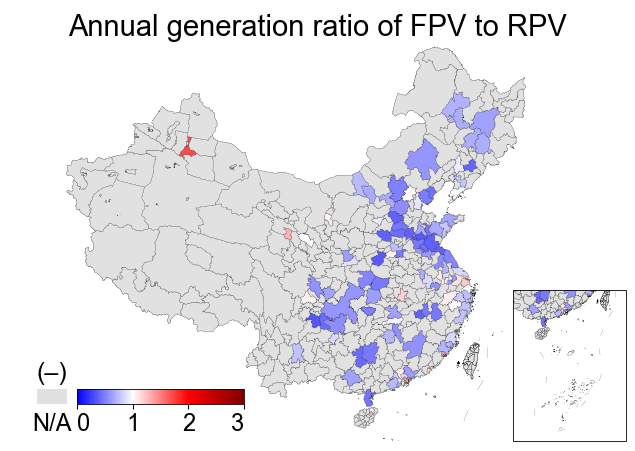

In [ ]:
## Facade-to-roof ratio of generation
import matplotlib.pyplot as plt
import numpy as np
from cartopy.feature import LAND
from scipy.ndimage import gaussian_filter
from matplotlib.cm import ScalarMappable

import frykit.plot as fplt
import frykit.shp as fshp

# Parameter settings
col_plot = "facade_roof_ratio_generation"

cmap = plt.get_cmap('seismic')
cmap = mcolors.LinearSegmentedColormap.from_list(
    "truncated", cmap(np.linspace(1/4, 1, 256))  # Use only the latter portion of the colormap
)
bad_color = '#E1E1E1'
cmap.set_bad(bad_color)

lw_cn_map = lw * 0.1
lw_axis = lw * 0.5

# Data preparation
city_table = fshp.get_cn_city_table(data_source='tianditu')  # Load city boundary metadata table
city_table_with_values = city_table.merge(df_plot, left_on='city_adcode', right_on='city_adcode', how='left')  # Merge by city_adcode

city_adcode = city_table_with_values['city_adcode'].astype(int)
cities = fshp.get_cn_city(city_adcode, data_source='tianditu')
data = city_table_with_values[col_plot]

vmin, vmax = data.min(), data.max()
norm = plt.Normalize(vmin=0, vmax=3)

# Set projection
map_crs = fplt.CN_AZIMUTHAL_EQUIDISTANT
data_crs = fplt.PLATE_CARREE

# Set tick marks
xticks = np.arange(-180, 181, 10)
yticks = np.arange(-90, 91, 10)

# Prepare main map
font_options = {'family': 'Arial', 'size': fs}
plt.rc('font', **font_options)

fig = plt.figure(figsize=np.array([figwidth * 2/3, figwidth * 2/3 * 0.7]) / 2.54)
main_ax = fig.add_subplot(projection=map_crs)

fplt.set_map_ticks(main_ax, (74, 136, 17, 55), xticks, yticks)
# main_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')
main_ax.set_adjustable('datalim')  # Adjust xlim and ylim to fit data
main_ax.set_xticks([])
main_ax.set_yticks([])
main_ax.axis('off')

# Prepare inset map
mini_ax = fplt.add_mini_axes(main_ax, shrink=0.35)
mini_ax.spines[:].set_linewidth(lw_axis)
mini_ax.set_extent((105, 122, 2, 25), data_crs)
# mini_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')

# Add features
for ax in [main_ax, mini_ax]:
    fplt.add_cn_border(ax, lw=lw_cn_map, fc='none', zorder=-10)
    fplt.add_cn_line(ax, lw=lw_cn_map)

# Draw filled polygons
for ax in [main_ax, mini_ax]:
    fplt.add_geometries(
        ax, cities, array=data,
        cmap=cmap, norm=norm,
        ec='black', lw=lw_cn_map,
    )
    taiwan_aeqd.plot(
        ax=ax, color='none', edgecolor='black',
        linewidth=lw_cn_map,
        )

# Set title
main_ax.set_title(
    'Annual generation ratio of FPV to RPV',
    y=0.92,
    fontsize=fs-3,
    weight='normal',
)

# --------------------- Create colorbar ---------------------
# Main colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cax = fig.add_axes([0.08 + 0.06, 0.12, 0.25, 0.03])  # Shift to the right to leave space for NaN block
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_ticks(np.arange(0, 4, 1))  # Set 5 evenly spaced ticks (adjust if needed)
cbar.ax.tick_params(labelsize=fs - 7)
cbar.outline.set_visible(True)
cbar.outline.set_linewidth(lw_axis)

# Align tick labels: left-aligned for min, right-aligned for max
tick_labels = cbar.ax.get_xticklabels()
tick_labels[0].set_horizontalalignment('left')
tick_labels[-1].set_horizontalalignment('right')

# Add NaN gray block
na_cax = fig.add_axes([0.08, 0.12, 0.045, 0.03])  # Position of the NaN color block
na_cax.set_facecolor(bad_color)
na_cax.set_xticks([])
na_cax.set_yticks([])
na_cax.spines[:].set_visible(False)
na_cax.text(0.5, -1.5, 'N/A', ha='center', va='center', fontsize=fs - 7, transform=na_cax.transAxes)

# Add unit label
main_ax.text(
    0.08, 0.12 + 0.03 + 0.01,  # Position: just above the NaN block
    '(\u2013)',                # Annotation text (dash or no unit)
    transform=fig.transFigure,
    ha='left', va='bottom', fontsize=fs - 6
)

# Adjust subplot layout
plt.subplots_adjust(left=0.04, right=0.96, bottom=0.04, top=0.96)

# Save figure
# plt.savefig('fig2_(b)2_facade_to_roof_generation_ratio.png', dpi=500)

# Show figure
plt.show()

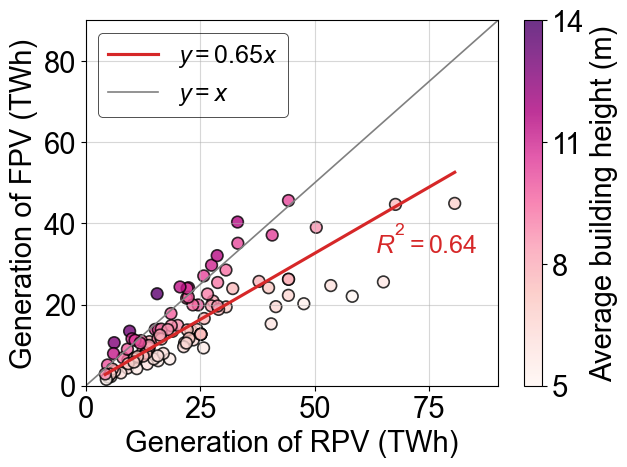

In [21]:
## Facade generation vs Roof generation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Parameter settings
cmap = 'RdPu'
vmin, vmax = df_plot['average_building_height'].min(), df_plot['average_building_height'].max()  # (4.99..., 13.52...)
norm = plt.Normalize(vmin=5, vmax=14)

color_fit = '#d62728'

font_options = {'family': 'Arial', 'size': fs-3}
plt.rc('font', **font_options)

fig, ax = plt.subplots(figsize=np.array([figwidth * 2/3, figwidth * 2/3 * 0.7]) / 2.54)
# ax.spines[:].set_linewidth(lw)
# ax.tick_params(width=lw)  # Default value: axes.linewidth and xtick.major.width = 0.8

# Scatter plot with third variable (average building height) controlling color
sc = ax.scatter(df_plot['roof_power'], df_plot['facade_power'],
                c=df_plot['average_building_height'], cmap=cmap, norm=norm,
                alpha=0.8, s=70, edgecolors='black', linewidths=lw)

# Plot fitted line
x = df_plot['roof_power'].values.reshape(-1, 1)
y = df_plot['facade_power'].values

model = LinearRegression(fit_intercept=False)
model.fit(x, y)
k = model.coef_[0]
R2 = model.score(x, y)

x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = k * x_fit
ax.plot(x_fit, y_fit, '-', color=color_fit, linewidth=lw2, 
        label=f'$y={k:.2f}x$')  #  Optionally also show R²
ax.text(
    0.95, 0.35,           # Near the end of the fitted line
    f'$R^2={R2:.2f}$',    # Annotation text
    fontsize=fs - 6,
    color=color_fit,
    transform=ax.transAxes,
    ha='right', va='bottom',
)

# Set axis labels
ax.set_xlim(0, 90)
ax.set_ylim(0, 90)
ax.set_xlabel('Generation of RPV (TWh)', fontsize=fs-3)
ax.set_ylabel('Generation of FPV (TWh)', fontsize=fs-3)

# Add y = x reference line
x_limits = ax.get_xlim()
x_line = np.linspace(x_limits[0], x_limits[1], 100)
ax.plot(x_line, x_line, linestyle='-', color='gray', linewidth=lw, label='$y=x$')

# Set grid and legend
ax.grid(alpha=0.5)

lg = ax.legend(loc='best', fontsize=fs - 6)
frame = lg.get_frame()
frame.set_linewidth(0.6)
frame.set_edgecolor('black')
frame.set_facecolor('none')

# Add colorbar showing third variable (average building height)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Average building height (m)', fontsize=fs - 3)
cbar.set_ticks(np.arange(5, 15, 3))  # Set 5 evenly spaced ticks (adjust as needed)
cbar.ax.tick_params(labelsize=fs - 3)

# Adjust subplot layout
plt.subplots_adjust(left=0.19, right=0.96, bottom=0.18, top=0.96)

# Save figure
# plt.savefig('fig2_(b)3_facade_vs_roof_generation.svg', dpi=500)

# Show figure
plt.show()

# Supplementary of Fig. 2. Overview of Selected Cities

## Data Preparation

In [22]:
# Columns represent roof area, maximum facade area, and filtered (cost-effective) facade area
df_plot = area_df.iloc[:, :2].copy()

# Merge population data and solar radiation data
df_plot = df_plot.merge(population_df, left_index=True, right_index=True)
df_plot = df_plot.merge(solar_df, left_index=True, right_index=True)

# Sort by urban population in ascending order within each city level
df_plot[['城区人口', '常住人口', '城镇化率']] = df_plot[['城区人口', '常住人口', '城镇化率']].astype(float)
df_plot.sort_values(['city_level', '城区人口'], ascending=True, inplace=True)

# Add 'city_adcode' column
df_plot = df_plot.merge(city_adcode_df, left_index=True, right_index=True, how='left')
df_plot['city_adcode'] = df_plot['city_adcode'].astype(int)

df_plot

,Area_roof-0(km2),Area_facade-0(km2),城市,所属省份,常住人口,城区人口,城镇化率,规模等级,城市类型,city_level,Global,Diff,Direct,ct_prefix,ct_adcode,city_prefix,city_adcode
Luzhou,124.393574,189.702765,泸州市,四川,425.41,99.98,0.502,II型大城市,地级市,0,1191.165068,715.654637,770.986679,泸州,510500,泸州,510500
Chifeng,359.453884,752.920000,赤峰市,内蒙古,403.60,101.37,0.531,II型大城市,地级市,0,1620.942445,626.037906,1962.476141,赤峰,150400,赤峰,150400
Lianyungang,263.886983,392.338298,连云港市,江苏,459.94,102.22,0.615,II型大城市,地级市,0,1566.637071,703.996369,1507.216926,连云,320700,连云,320700
Changzhi,178.514973,268.408697,长治市,山西,318.09,102.41,0.565,II型大城市,地级市,0,1630.709257,686.013883,1697.902285,长治,140400,长治,140400
Hengyang,378.397959,725.885324,衡阳市,湖南,664.52,102.57,0.543,II型大城市,地级市,0,1371.914088,751.850433,1023.231354,衡阳,430400,衡阳,430400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chongqing,1068.349128,1873.330000,重庆市,重庆,3205.42,1634.40,0.695,超大城市,直辖市,3,1226.718429,715.335252,839.973666,重庆,500100,重庆,500000
Chongqing,1068.349128,1873.330000,重庆市,重庆,3205.42,1634.40,0.695,超大城市,直辖市,3,1226.718429,715.335252,839.973666,重庆,500200,重庆,500000
Shenzhen,249.267419,688.891028,深圳市,广东,1749.44,1743.83,0.997,超大城市,计划单列市,3,1574.673197,845.961782,1171.205156,深圳,440300,深圳,440300
Beijing,674.936604,1517.484620,北京市,北京,2189.31,1775.17,0.875,超大城市,直辖市,3,1591.831149,650.025689,1785.786098,北京,110100,北京,110000


In [24]:
# --------------------- Load and unify to geographic coordinate system (EPSG:4326) ---------------------
import geopandas as gpd
import pyproj
file_path_taiwan = '台湾矢量地图shp数据/'
taiwan = gpd.read_file(file_path_taiwan + '台湾省-市矢量shp.shp').to_crs(epsg=4326)

# Convert the GeoDataFrame from WGS84 (EPSG:4326) to Azimuthal Equidistant projection
# Set the central coordinates to 105°E, 35°N
proj_aeqd = (
    "+proj=aeqd "
    "+lat_0=35 "   # Central latitude
    "+lon_0=105 "  # Central longitude
    "+datum=WGS84 "
    "+units=m "
    "+no_defs "
)
# Alternatively, use pyproj.CRS.from_proj4() to create a CRS object
aeqd_crs = pyproj.CRS.from_proj4(proj_aeqd)
# Convert to the Azimuthal Equidistant projection
taiwan_aeqd = taiwan.to_crs(aeqd_crs)

## Subfigure (a) City Tier Classification

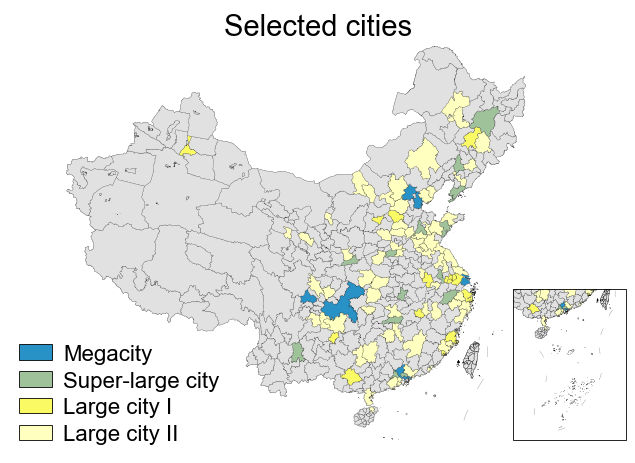

In [25]:
## Facade area (City level map of selected cities)
import matplotlib.pyplot as plt
import numpy as np
from cartopy.feature import LAND
import matplotlib.patches as mpatches

import frykit.plot as fplt
import frykit.shp as fshp

# Parameter settings
col_plot = "city_level"

n_levels = df_plot['city_level'].nunique()  # Get the number of unique city levels
colors_level = ['#FFFFBF', '#FAFA64', '#A0C29B', '#2892C7']
cmap = ListedColormap(colors_level)
bad_color = '#E1E1E1'
cmap.set_bad(bad_color)

labels_level = ['Large city II', 'Large city I', 'Super-large city', 'Megacity']

lw_cn_map = lw * 0.1
lw_axis = lw * 0.5

# Data preparation
city_table = fshp.get_cn_city_table(data_source='tianditu')  # Get metadata table for city boundaries
city_table_with_values = city_table.merge(df_plot, left_on='city_adcode', right_on='city_adcode', how='left')  # Merge by city_adcode

city_adcode = city_table_with_values['city_adcode'].astype(int)
cities = fshp.get_cn_city(city_adcode, data_source='tianditu')
data = city_table_with_values[col_plot]

vmin, vmax = data.min(), data.max()
norm = plt.Normalize(vmin=-0.5, vmax=n_levels - 0.5)

# Set projection
map_crs = fplt.CN_AZIMUTHAL_EQUIDISTANT
data_crs = fplt.PLATE_CARREE

# Set tick marks
xticks = np.arange(-180, 181, 10)
yticks = np.arange(-90, 91, 10)

# Prepare main map
font_options = {'family': 'Arial', 'size': fs}
plt.rc('font', **font_options)

fig = plt.figure(figsize=np.array([figwidth * 2 / 3, figwidth * 2 / 3 * 0.7]) / 2.54)
main_ax = fig.add_subplot(projection=map_crs)

fplt.set_map_ticks(main_ax, (74, 136, 17, 55), xticks, yticks)
# main_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')
main_ax.set_adjustable('datalim')  # Allow Axes to adjust xlim and ylim based on data
main_ax.set_xticks([])
main_ax.set_yticks([])
main_ax.axis('off')

# Prepare inset map
mini_ax = fplt.add_mini_axes(main_ax, shrink=0.35)
mini_ax.spines[:].set_linewidth(lw_axis)
mini_ax.set_extent((105, 122, 2, 25), data_crs)
# mini_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')

# Add map features
for ax in [main_ax, mini_ax]:
    fplt.add_cn_border(ax, lw=lw_cn_map, fc='none', zorder=-10)
    fplt.add_cn_line(ax, lw=lw_cn_map)

# Plot filled polygons
for ax in [main_ax, mini_ax]:
    fplt.add_geometries(
        ax, cities, array=data,
        cmap=cmap, norm=norm,
        ec='black', lw=lw_cn_map,
    )
    taiwan_aeqd.plot(
        ax=ax, color='none', edgecolor='black',
        linewidth=lw_cn_map,
    )

# Set title
main_ax.set_title(
    'Selected cities',
    y=0.92,
    fontsize=fs - 3,
    weight='normal',
)

# Add legend
patches = []
for color, label in zip(colors_level, labels_level):
    patch = mpatches.Patch(fc=color, ec='k',
            lw=lw_axis, label=label)
    patches.append(patch)

main_ax.legend(
    handles=patches[::-1],
    loc=(0.0, -0.03),
    frameon=False,
    handleheight=0.7,      # Default is 0.7
    handlelength=1.5,      # Default is 2
    fontsize=fs - 8,
    # title='data (units)',
    labelspacing=0.3,      # Vertical spacing between legend entries
    handletextpad=0.5,     # Space between handle and text
)

# # Add subplot label
# main_ax.text(0, 1, f'a', transform=main_ax.transAxes,
#              ha='left', va='top', fontsize=fs + 9, fontweight='bold')

# Adjust layout
plt.subplots_adjust(left=0.04, right=0.96, bottom=0.04, top=0.96)

# Save figure
# plt.savefig('fig2_Appendix1(a)_selected_cities.png', dpi=500)

# Show figure
plt.show()

## Subfigure (b) Solar Energy Resources

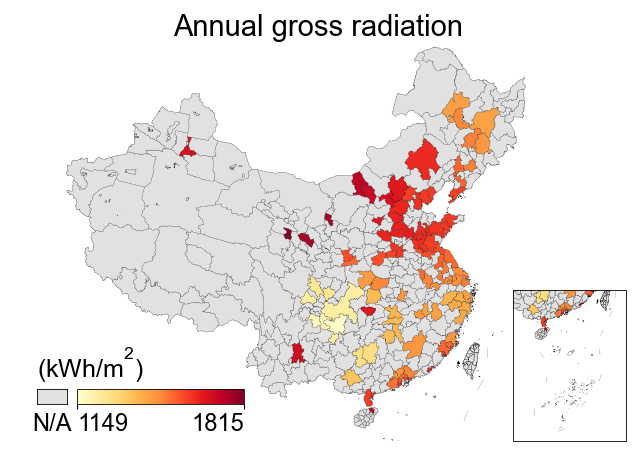

In [26]:
## Facade area
import matplotlib.pyplot as plt
import numpy as np
from cartopy.feature import LAND
from scipy.ndimage import gaussian_filter
from matplotlib.cm import ScalarMappable

import frykit.plot as fplt
import frykit.shp as fshp

# Parameter settings
col_plot = "Global"

cmap = plt.get_cmap('YlOrRd')
bad_color = '#E1E1E1'
cmap.set_bad(bad_color)

lw_cn_map = lw * 0.1
lw_axis = lw * 0.5

# Data preparation
city_table = fshp.get_cn_city_table(data_source='tianditu')  # Get metadata table for city boundaries
city_table_with_values = city_table.merge(df_plot, left_on='city_adcode', right_on='city_adcode', how='left')  # Merge by city_adcode

city_adcode = city_table_with_values['city_adcode'].astype(int)
cities = fshp.get_cn_city(city_adcode, data_source='tianditu')
data = city_table_with_values[col_plot]

vmin, vmax = np.floor(data.min() * 1) / 1, np.ceil(data.max() * 1) / 1
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Set projection
map_crs = fplt.CN_AZIMUTHAL_EQUIDISTANT
data_crs = fplt.PLATE_CARREE

# Set ticks
xticks = np.arange(-180, 181, 10)
yticks = np.arange(-90, 91, 10)

# Prepare main map
font_options = {'family': 'Arial', 'size': fs}
plt.rc('font', **font_options)

fig = plt.figure(figsize=np.array([figwidth * 2 / 3, figwidth * 2 / 3 * 0.7]) / 2.54)
main_ax = fig.add_subplot(projection=map_crs)

fplt.set_map_ticks(main_ax, (74, 136, 17, 55), xticks, yticks)
# main_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')
main_ax.set_adjustable('datalim')  # Allow Axes to adjust xlim and ylim based on data
main_ax.set_xticks([])
main_ax.set_yticks([])
main_ax.axis('off')

# Prepare inset map
mini_ax = fplt.add_mini_axes(main_ax, shrink=0.35)
mini_ax.spines[:].set_linewidth(lw_axis)
mini_ax.set_extent((105, 122, 2, 25), data_crs)
# mini_ax.gridlines(xlocs=xticks, ylocs=yticks, lw=0.5, ls='--', color='gray')

# Add map features
for ax in [main_ax, mini_ax]:
    fplt.add_cn_border(ax, lw=lw_cn_map, fc='none', zorder=-10)
    fplt.add_cn_line(ax, lw=lw_cn_map)

# Draw filled polygons
for ax in [main_ax, mini_ax]:
    fplt.add_geometries(
        ax, cities, array=data,
        cmap=cmap, norm=norm,
        ec='black', lw=lw_cn_map,
    )
    taiwan_aeqd.plot(
        ax=ax, color='none', edgecolor='black',
        linewidth=lw_cn_map,
    )

# Set title
main_ax.set_title(
    'Annual gross radiation',
    y=0.92,
    fontsize=fs-3,
    weight='normal',
)

# --------------------- Create colorbar ---------------------
# Main colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cax = fig.add_axes([0.08 + 0.06, 0.12, 0.25, 0.03])  # Move right to leave space for NaN color block
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_ticks(np.linspace(vmin, vmax, 2))
cbar.ax.tick_params(labelsize=fs - 7,  # length=0
        )  # Set font size as fs (the size you defined)
cbar.outline.set_visible(True)  # Remove outline
cbar.outline.set_linewidth(lw_axis)

# Align tick label: left-align for min value, right-align for max value
tick_labels = cbar.ax.get_xticklabels()
tick_labels[0].set_horizontalalignment('left')
tick_labels[-1].set_horizontalalignment('right')

# Add NaN gray block
na_cax = fig.add_axes([0.08, 0.12, 0.045, 0.03])  # Color block position (small colorbar)
na_cax.set_facecolor(bad_color)  # Set to gray
na_cax.set_xticks([])  # Remove ticks
na_cax.set_yticks([])
na_cax.spines[:].set_linewidth(lw_axis)  # Remove borders
na_cax.text(0.5, -1.5, 'N/A', ha='center', va='center', fontsize=fs - 7, transform=na_cax.transAxes)

# Add annotation
main_ax.text(
    0.08, 0.12 + 0.03 + 0.01,  # Position: a little above the NaN color block center
    '(kWh/m$^2$)',                  # Annotation text
    transform=fig.transFigure,            # Use figure coordinates for positioning
    ha='left', va='bottom', fontsize=fs - 6
)

# # Add subplot label
# main_ax.text(0, 1, f'a', transform=main_ax.transAxes,
#              ha='left', va='top', fontsize=fs + 9, fontweight='bold')

# Adjust subplot layout
plt.subplots_adjust(left=0.04, right=0.96, bottom=0.04, top=0.96,
		# wspace=0.25, hspace=0.21
        )

# Save the figure
# plt.savefig('fig2_Appendix1(b)_Solar_Resource.png', dpi=500)

# Show the figure
plt.show()

## Subfigure (c) Roof Area vs Population

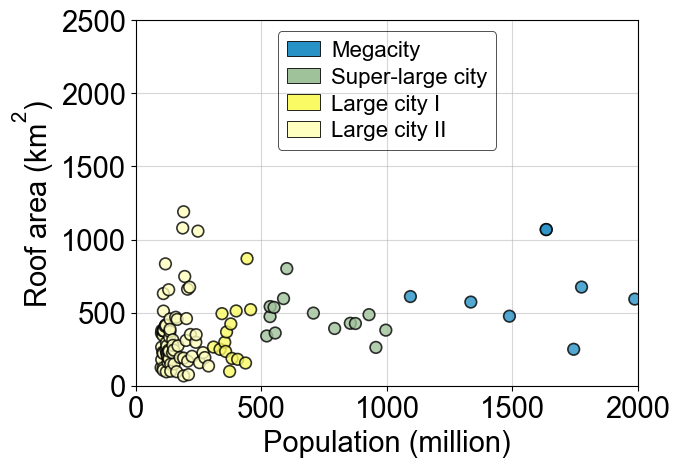

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Set color mapping (City level) — Discrete colors
n_levels = df_plot['city_level'].nunique()  # Get the number of unique city levels
# cmap = plt.colormaps.get_cmap('RdPu').resampled(n_levels)  # Generate discrete colormap
colors_level = ['#FFFFBF', '#FAFA64', '#A0C29B', '#2892C7']  # Customizable color palette
cmap = ListedColormap(colors_level)

norm = plt.Normalize(vmin=-0.5, vmax=n_levels-0.5)

# Set font options
font_options = {'family': 'Arial', 'size': fs-3}
plt.rc('font', **font_options)

fig, ax = plt.subplots(figsize=np.array([figwidth * 2 / 3, figwidth * 2 / 3 * 0.7]) / 2.54)
# ax.spines[:].set_linewidth(lw)
# ax.tick_params(width=lw)  # Default axes.linewidth and xtick.major.width = 0.8

# Plot scatter plot:
sc = ax.scatter(
    df_plot['城区人口'],          # x: Resident Population
    df_plot['Area_roof-0(km2)'], # y: Roof area
    c=df_plot['city_level'],     # color: City level
    cmap=cmap,          # Use discrete RdPu
    norm=norm,  # Map the colors to city level
    s=70,
    alpha=0.8,
    edgecolors='black',
    linewidths=lw,
    zorder=10,
)

# Set axis labels
ax.set_xlim(0, 2000)
ax.set_ylim(0, 2500)
ax.set_xlabel('Population (million)', fontsize=fs-3)
ax.set_ylabel('Roof area (km$^2$)', fontsize=fs-3)
ax.grid(alpha=0.5, zorder=-1)

# Add legend
patches = []
for color, label in zip(colors_level, labels_level):
    patch = mpatches.Patch(fc=color, ec='k',
            lw=lw_axis, label=label)
    patches.append(patch)

lg = ax.legend(
    handles=patches[::-1],
    loc='upper center',
    # bbox_to_anchor=(0,1),
    # frameon=False,
    handleheight=0.7,  # Default value 0.7
    handlelength=1.5,  # Default value 2
    fontsize=fs - 8,
    # title='data (units)',
    labelspacing=0.3,  # Vertical spacing between entries (default ~ 0.5)
    handletextpad=0.5,  # Default value 0.8
)
lg.get_frame().set(linewidth=0.6, ec='black', fc='none')

# Adjust subplot layout
plt.subplots_adjust(left=0.19, right=0.94, bottom=0.18, top=0.96,
		# wspace=0.25, hspace=0.21
        )

# Save figure
# plt.savefig('fig2_Appendix1(c)_Roof_Area.svg', dpi=500)

plt.show()

## Subfigure (d) Facade Area vs Population

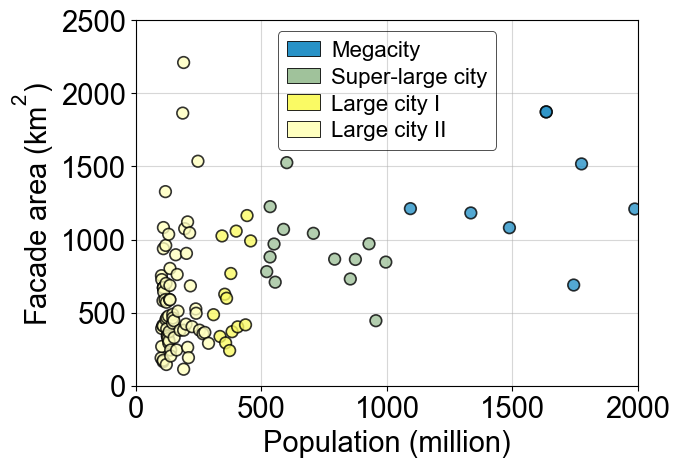

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 设定颜色映射（City level）—— 离散色彩
n_levels = df_plot['city_level'].nunique()  # 获取 city_level 级别数
# cmap = plt.colormaps.get_cmap('RdPu').resampled(n_levels)  # 生成离散 colormap
colors_level = ['#FFFFBF', '#FAFA64', '#A0C29B', '#2892C7']  # 你可以自定义颜色
cmap = ListedColormap(colors_level)

norm = plt.Normalize(vmin=-0.5, vmax=n_levels-0.5)

# 设置字体
font_options = {'family': 'Arial', 'size': fs-3}
plt.rc('font', **font_options)

fig, ax = plt.subplots(figsize=np.array([figwidth * 2/3, figwidth * 2/3 * 0.7]) / 2.54)
# ax.spines[:].set_linewidth(lw)
# ax.tick_params(width=lw)  # 默认 axes.linewidth xtick.major.width 为 0.8

# 绘制散点图：
sc = ax.scatter(
    df_plot['城区人口'],          # x: Resident Population
    df_plot['Area_facade-0(km2)'], # y: Roof area
    c=df_plot['city_level'],     # color: City level
    cmap=cmap,          # 使用离散的 RdPu
    norm=norm,  # 让颜色映射匹配 city_level
    s=70,
    alpha=0.8,
    edgecolors='black',
    linewidths=lw,
    zorder=10,
)

# 设置坐标轴标签
ax.set_xlim(0, 2000)
ax.set_ylim(0, 2500)
ax.set_xlabel('Population (million)', fontsize=fs-3)
ax.set_ylabel('Facade area (km$^2$)', fontsize=fs-3)
ax.grid(alpha=0.5, zorder=-1)

# 添加图例
patches = []
for color, label in zip(colors_level, labels_level):
    patch = mpatches.Patch(fc=color, ec='k',
            lw=lw_axis, label=label)
    patches.append(patch)

lg = ax.legend(
    handles=patches[::-1],
    loc='upper center',
    # bbox_to_anchor=(0,1),
    # frameon=False,
    handleheight=0.7,  # 默认值 0.7
    handlelength=1.5,  # 默认值 2
    fontsize=fs - 8,
    # title='data (units)',
    labelspacing=0.3,  # 各行之间的垂直间距（默认约 0.5）
    handletextpad=0.5,  # 默认值 0.8
)
lg.get_frame().set(linewidth=0.6, ec='black', fc='none')

# 调整子图关系
plt.subplots_adjust(left=0.19, right=0.94, bottom=0.18, top=0.96,
		# wspace=0.25, hspace=0.21
        )

# 保存图形
plt.savefig('fig2_附录1(d)立面面积.svg', dpi=500)

plt.show()

# Supplementary of Fig. 2. Detailed Data of Different Cities

## Data Preparation

In [28]:
import numpy as np
import pandas as pd

# Merge area data and annual generation data
df_plot = area_df.iloc[:, :2].copy()  # km^2

roof_power = roof_data_1  # TWh
facade_power = ideal_facade_data_1  # TWh
df_plot['roof_power'] = roof_power
df_plot['facade_power'] = facade_power

# Merge average building height data
df_plot = df_plot.merge(average_building_height, left_index=True, right_index=True)

# Calculate the ratio of facade to roof area and generation
df_plot['facade_roof_ratio_area'] = df_plot['Area_facade-0(km2)'] / df_plot['Area_roof-0(km2)']
df_plot['facade_roof_ratio_generation'] = df_plot['facade_power'] / df_plot['roof_power']

# Merge population data
df_plot = df_plot.merge(population_df, left_index=True, right_index=True)

df_plot

,Area_roof-0(km2),Area_facade-0(km2),roof_power,facade_power,average_building_height,facade_roof_ratio_area,facade_roof_ratio_generation,城市,所属省份,常住人口,城区人口,城镇化率,规模等级,城市类型,city_level
Anshan,224.927169,427.829452,13.900037,10.842595,7.736781,1.902080,0.780041,鞍山市,辽宁,332.54,145.74,0.746,II型大城市,地级市,0
Baotou,188.971008,379.906312,13.340495,9.823765,8.856795,2.010395,0.736387,包头市,内蒙古,270.94,189.78,0.862,II型大城市,地级市,0
Baoding,1190.067102,2211.180000,80.536021,44.907661,6.789533,1.858030,0.557610,保定市,河北,1154.40,189.69,0.557,II型大城市,地级市,0
Beijing,674.936604,1517.484620,44.249424,45.607126,10.218969,2.248337,1.030683,北京市,北京,2189.31,1775.17,0.875,超大城市,直辖市,3
Changzhou,264.602426,485.948549,15.154687,13.876589,10.070088,1.836523,0.915663,常州市,江苏,527.81,308.82,0.771,I型大城市,地级市,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chongqing,1068.349128,1873.330000,44.259085,26.215900,7.806437,1.753481,0.592328,重庆市,重庆,3205.42,1634.40,0.695,超大城市,直辖市,3
Zhuhai,67.280147,112.881912,4.251027,2.897614,8.775101,1.677789,0.681627,珠海市,广东,243.96,189.80,0.905,II型大城市,地级市,0
Zhuzhou,183.523757,306.954250,9.263919,5.422614,6.932758,1.672559,0.585348,株洲市,湖南,390.27,131.55,0.713,II型大城市,地级市,0
Zibo,349.077138,495.790038,21.963887,10.502944,6.387719,1.420288,0.478191,淄博市,山东,470.41,239.58,0.743,II型大城市,地级市,0


## Subfigure (a) Area

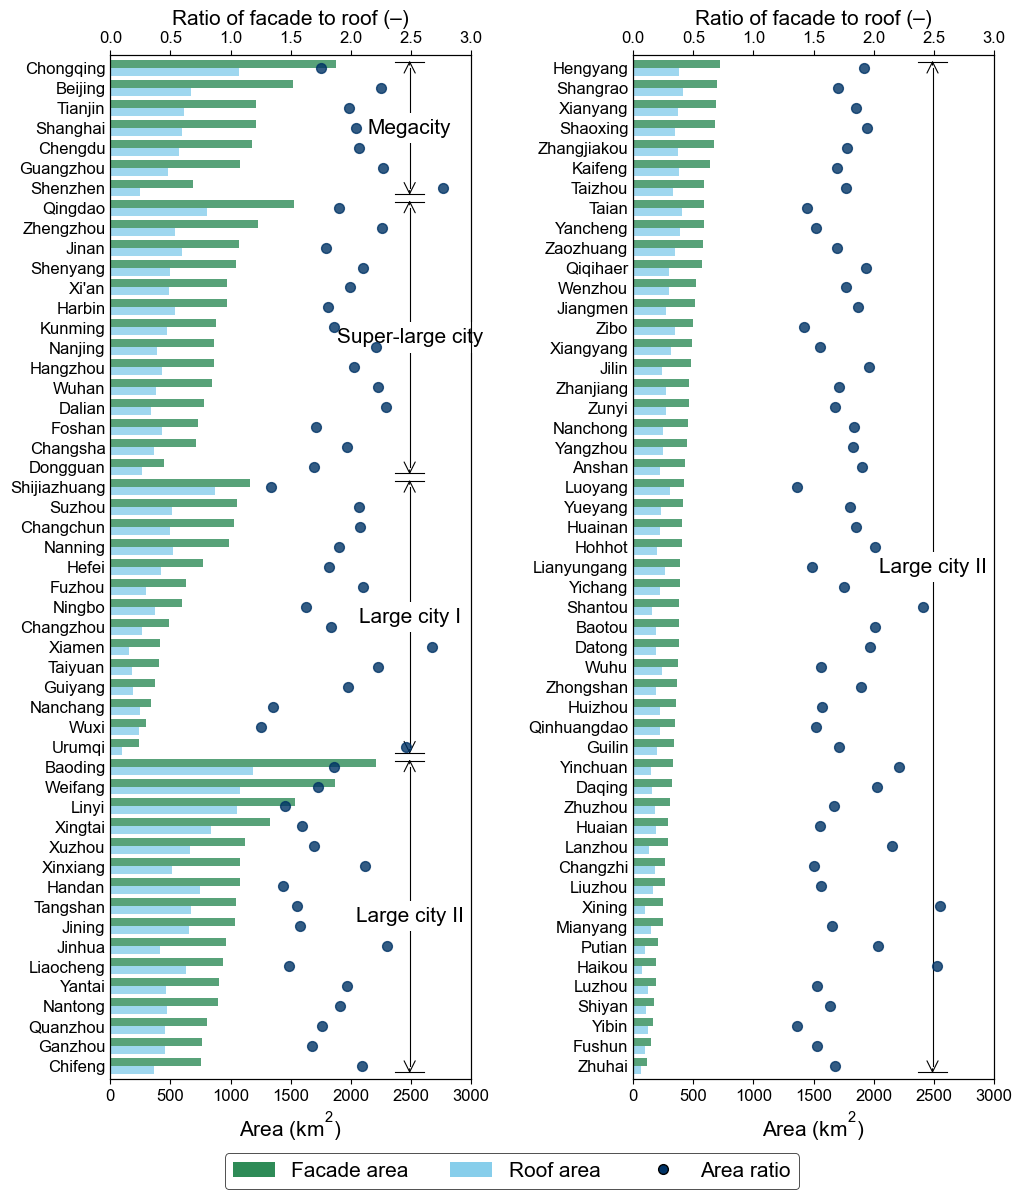

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors = ['#87CEEB', '#2E8B57']  # Blue and green, corresponding to roof and facade
color_ratio = '#003366'
lw_axis = 0.8

# ----------------- Data Preparation -----------------
# df_plot index is city names, columns include:
#   city_level, Area_facade-0(km2), Area_roof-0(km2)
df_vis = df_plot.copy()
df_vis = df_vis.rename(index={
    'Haerbin': 'Harbin',
    'Huhehaote': 'Hohhot',
    'Wulumuqi': 'Urumqi',
    'Xian': "Xi'an"
})

# 1) Sort by city_level (descending) and Area_facade-0(km2) (descending)
df_vis.sort_values(
    by=['city_level', 'Area_facade-0(km2)'],
    ascending=[False, False],
    inplace=True
)

# 2) Split the cities into two parts
n = len(df_vis)
mid = n // 2
df_vis_part1 = df_vis.iloc[:mid]
df_vis_part2 = df_vis.iloc[mid:]

# Define a mapping dictionary for city levels (example, can be modified/expanded)
level_labels = {
    3: 'Megacity',
    2: 'Super-large city',
    1: 'Large city I',
    0: 'Large city II'
}

# ----------------- Create canvas and subplots -----------------
font_options = {'family': 'Arial', 'size': fs-12}
plt.rc('font', **font_options)

fig, axes = plt.subplots(
    1, 2,
    figsize=np.array([figwidth, figwidth * 1.2]) / 2.54,
)

parts = [df_vis_part1, df_vis_part2]

for i_ax, df_part in enumerate(parts):
    ax = axes[i_ax]

    # Construct a temporary table temp_part to retain city_level for later labeling
    temp_part = df_part[['city_level', 'Area_facade-0(km2)', 'Area_roof-0(km2)', 'facade_roof_ratio_area']].copy()
    # Only two columns for actual plotting
    df_plot_part = temp_part[['Area_facade-0(km2)', 'Area_roof-0(km2)']]

    # Plot horizontal bar chart
    df_plot_part.plot(
        kind='barh',
        ax=ax,
        stacked=False,
        width=0.8,
        edgecolor='none',
        linewidth=lw_axis,
        alpha=0.8,
        color=colors[::-1],  # Facade, Roof
        legend=False,
    )

    # Reverse the y-axis order
    ax.invert_yaxis()

    ax.set_xlim(0, 3000)
    ax.yaxis.set_tick_params(length=0)
    ax.set_xlabel("Area (km$^2$)", fontsize=fs-9)
    ax.set_ylabel(None)

    # -------------- Labeling city levels --------------
    # Reset index to match row_idx with barh y-axis order
    temp_part.reset_index(inplace=True)       # Turn city names into a column
    temp_part['row_idx'] = temp_part.index    # Row index for y-axis in barh

    # Group by city_level, find the min and max row indices for each group on the y-axis
    grouped = temp_part.groupby('city_level')['row_idx']
    for lvl, rows in grouped:
        min_idx = rows.min()
        max_idx = rows.max()
        mid_idx = 0.5 * (min_idx + max_idx)  # Vertical middle

        # x_pos: offset from the far-right of the largest bar, used for drawing arrows and text
        x_pos = ax.get_xlim()[-1] * 0.83
        # Arrow length
        arrow_len = 0.5
        h_len = ax.get_xlim()[-1] * 0.04  # Half-length of horizontal line (example value)

        # (1) Top arrow
        ax.annotate(
            '',
            xy=(x_pos, min_idx),
            xytext=(x_pos, min_idx - arrow_len),
            arrowprops=dict(arrowstyle='<-', lw=lw_axis, color='black', mutation_scale=20),  # Larger value makes the arrow bigger
            annotation_clip=False,
            transform=ax.transData,
        )
        ax.plot(
            [x_pos - h_len, x_pos + h_len],  # Left and right endpoints
            [min_idx-0.3, min_idx-0.3],              # Same y-value
            color='black',
            lw=lw_axis,
            transform=ax.transData,
            clip_on=False
        )

        # (2) Vertical line
        ax.plot(
            [x_pos, x_pos], 
            [min_idx, max_idx],
            color='black', lw=lw_axis,
            transform=ax.transData,
            clip_on=False
        )

        # (3) Bottom arrow
        ax.annotate(
            '',
            xy=(x_pos, max_idx),
            xytext=(x_pos, max_idx + arrow_len),
            arrowprops=dict(arrowstyle='<-', lw=lw_axis, color='black', mutation_scale=20),
            annotation_clip=False,
            transform=ax.transData
        )
        ax.plot(
            [x_pos - h_len, x_pos + h_len],
            [max_idx+0.3, max_idx+0.3],
            color='black',
            lw=lw_axis,
            transform=ax.transData,
            clip_on=False
        )

        # (4) Add text at the midpoint of the vertical line
        text_label = level_labels.get(lvl, f'Level {lvl}')
        ax.text(
            x_pos, mid_idx,
            text_label,
            ha='center', va='center',
            fontsize=fs-9,
            transform=ax.transData,
            bbox=dict(
                facecolor='white',         # Background color
                edgecolor='none'           # Remove border
            )
        )

    # -------------- Plot ratio scatter on the same subplot with ax.twiny() --------------
    # Create a new x-axis with shared y-axis
    ax2 = ax.twiny()
    
    # y-values correspond to barh, need to use row_idx
    y_vals = temp_part['row_idx']
    # x-values are the ratios
    x_vals = temp_part['facade_roof_ratio_area']
    
    # Plot scatter plot
    ax2.scatter(x_vals, y_vals, color=color_ratio, s=50,
            alpha=0.8, marker='o')
    
    # Set x-axis labels, limits, ticks, etc.
    ax2.set_xlim(0, 3)
    ax2.set_xlabel("Ratio of facade to roof (\u2013)", fontsize=fs-9)
    
    # Make sure y-axis range matches ax
    ax2.set_ylim(ax.get_ylim())

# ----------------- Add unified legend -----------------
lg = fig.legend(
    handles=[
        mpatches.Patch(fc=colors[1], label='Facade area'),  # Green
        mpatches.Patch(fc=colors[0], label='Roof area'),    # Blue
        plt.Line2D([0], [0], marker='o', color='none', markerfacecolor=color_ratio,
                   markersize=7, label='Area ratio')  # Dark blue circle
    ],
    handleheight=0.7,  # Default value 0.7
    handlelength=2,  # Default value 2
    loc='lower center',
    ncol=3,
    fontsize=fs - 9,
    bbox_to_anchor=(0.5, 0.00)  # Legend placed below the entire figure
)
frame = lg.get_frame()
frame.set_linewidth(0.6)
frame.set_edgecolor('black')
frame.set_facecolor('none')

# ----------------- Adjust layout and save -----------------
# Adjust subplot layout
plt.subplots_adjust(left=0.10, right=0.98, bottom=0.1, top=0.95,
		wspace=0.45, hspace=0
        )

# plt.savefig('fig2_Appendix2(a)_Area_Relationship.svg', dpi=500)

plt.show()

## Subfigure (c) Area Boxplot

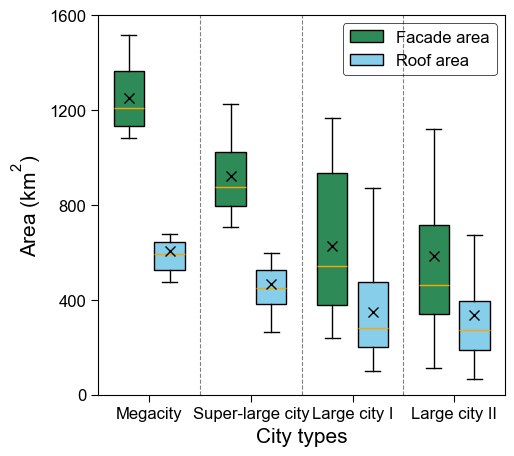

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = ['#87CEEB', '#2E8B57']  # Blue and green, corresponding to roof and facade
color_ratio = '#003366'
lw_axis = 0.8
lw_box = 1.0

# ---------------- Custom city level labels ----------------
level_labels = {
    3: 'Megacity',
    2: 'Super-large city',
    1: 'Large city I',
    0: 'Large city II'
}

# Map city level to category names and sort in descending order
df_plot['city_level_label'] = df_plot['city_level'].map(level_labels)
ordered_labels = [level_labels[i] for i in sorted(level_labels.keys(), reverse=True)]

# ----------------- Organize Data -----------------
# df_plot contains:
#   - city_level_label (grouping basis)
#   - 'Area_facade-0(km2)' (Facade)
#   - 'Area_roof-0(km2)'   (Roof)
# Extract Facade/Roof for each city_level_label

# Loop through ordered_labels for plotting
facade_data = []
roof_data = []
for label in ordered_labels:
    df_sub = df_plot[df_plot['city_level_label'] == label]
    # Facade and Roof values
    facade_vals = df_sub['Area_facade-0(km2)'].dropna().values
    roof_vals = df_sub['Area_roof-0(km2)'].dropna().values
    facade_data.append(facade_vals)
    roof_data.append(roof_vals)

# ----------------- Create Plot -----------------
font_options = {'family': 'Arial', 'size': fs - 12}
plt.rc('font', **font_options)

fig, ax = plt.subplots(figsize=np.array([figwidth * 0.5, figwidth * 0.5 * 0.9]) / 2.54,)  # Figure size in inches

# Center positions for each city level on the x-axis
x_positions = np.arange(len(ordered_labels))

# Offsets for Facade and Roof within the same group
offset_facade = -0.2
offset_roof   = +0.2

# Common parameters for the boxplot
common_props = dict(
    showfliers=False,  # Do not show outliers
    patch_artist=True, # Allow custom filling color for the box
    showmeans=True,    # Show mean point
    widths=0.3,        # Box width
    medianprops=dict(color='orange', linewidth=lw_box),  # Median line
    # boxprops=dict(edgecolor='black', linewidth=lw_box),  # Box edge
    # whiskerprops=dict(color='black', linewidth=lw_box),  # Whisker line
    # capprops=dict(color='black', linewidth=lw_box),  # Cap line
    meanprops=dict(marker='x', markerfacecolor='black',
        markeredgecolor='black', markersize=7, linewidth=lw_axis),
)

# Colors
color_facade = colors[-1]
color_roof   = colors[0]

# --------------- Draw Facade and Roof Boxplots ---------------
# 1) Facade
for i, data_vals in enumerate(facade_data):
    # Draw boxplot at x_positions[i] + offset_facade
    bp = ax.boxplot(
        [data_vals],            # Boxplot requires an iterable, here only one group of data
        positions=[x_positions[i] + offset_facade],
        **common_props
    )
    # Fill the box with color
    for box in bp['boxes']:
        box.set_facecolor(color_facade)

# 2) Roof
for i, data_vals in enumerate(roof_data):
    bp = ax.boxplot(
        [data_vals],
        positions=[x_positions[i] + offset_roof],
        **common_props
    )
    for box in bp['boxes']:
        box.set_facecolor(color_roof)

# ----------------- Draw Vertical Guide Lines -----------------
# Draw vertical lines between each group to help differentiate city types
# Since x-axis ticks are at 0, 1, 2,..., we can draw guide lines at x = i - 0.5 (i=1,2,...)
for i in range(1, len(ordered_labels)):
    ax.axvline(x=i - 0.5, color='grey', linestyle='--', linewidth=lw_axis)

# ----------------- Axis and Legend Settings -----------------
# Place x-axis ticks at the center of each group
ax.set_xticks(np.arange(len(ordered_labels)))
ax.set_xticklabels(ordered_labels)

# Set y-axis limits and ticks (based on your needs)
ax.set_xlim(-0.5, len(ordered_labels)-0.5)
ax.set_ylim(0, 1600)
ax.set_yticks(np.arange(0, 2000, 400))
ax.set_ylabel("Area (km$^2$)", fontsize=fs - 9)
ax.set_xlabel("City types", fontsize=fs - 9)

# Set axis appearance
ax.tick_params(axis='both', which='major', length=5, width=lw_axis, color='black')
for spine in ax.spines.values():
    spine.set_linewidth(lw_axis)
    spine.set_color('black')

# Manually create legend
patch_facade = mpatches.Patch(facecolor=color_facade, edgecolor='black', label='Facade area')
patch_roof   = mpatches.Patch(facecolor=color_roof, edgecolor='black', label='Roof area')
lg = ax.legend(handles=[patch_facade, patch_roof],
               fontsize=fs - 12, loc='upper right')
lg.get_frame().set_linewidth(0.6)
lg.get_frame().set_edgecolor('black')
lg.get_frame().set_facecolor('none')

# ----------------- Adjust Layout and Save -----------------
# Adjust subplot layout
plt.subplots_adjust(left=0.17, right=0.98, bottom=0.12, top=0.96,
		wspace=0.45, hspace=0
        )

# plt.savefig('fig2_Appendix2(c)_Area.svg', dpi=500)

plt.show()

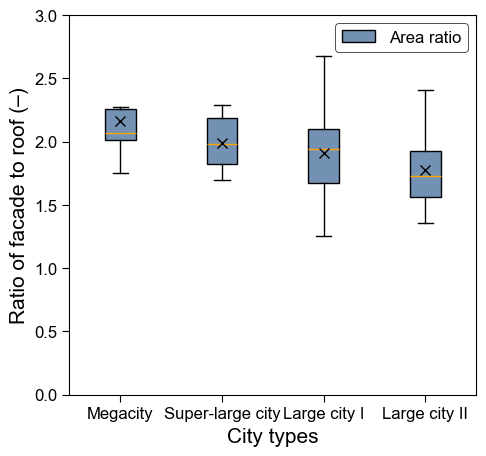

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = ['#87CEEB', '#2E8B57']  # Blue and green, corresponding to roof and facade (not used here)
color_ratio = '#7391B2'  #'#003366'
lw_axis = 0.8
lw_box = 1.0

# ---------------- Custom city level labels ----------------
level_labels = {
    3: 'Megacity',
    2: 'Super-large city',
    1: 'Large city I',
    0: 'Large city II'
}

# Map city level to category names and sort in descending order
df_plot['city_level_label'] = df_plot['city_level'].map(level_labels)
ordered_labels = [level_labels[i] for i in sorted(level_labels.keys(), reverse=True)]

# ----------------- Organize Data -----------------
# Extract facade_roof_ratio_area values for each city_level_label
ratio_data = []
for label in ordered_labels:
    df_sub = df_plot[df_plot['city_level_label'] == label]
    ratio_vals = df_sub['facade_roof_ratio_area'].dropna().values
    ratio_data.append(ratio_vals)

# ----------------- Create Plot -----------------
font_options = {'family': 'Arial', 'size': fs - 12}
plt.rc('font', **font_options)

fig, ax = plt.subplots(figsize=np.array([figwidth * 0.5, figwidth * 0.5 * 0.9]) / 2.54)  # Figure size in inches

# Center positions for each city level on the x-axis
x_positions = np.arange(len(ordered_labels))

# ----------------- Draw Boxplot -----------------
common_props = dict(
    showfliers=False,             # Do not show outliers
    patch_artist=True,            # Allow box filling
    showmeans=True,
    widths=0.3,                   # Box width
    medianprops=dict(color='orange', linewidth=lw_box),  # Median line style
    meanprops=dict(marker='x', markerfacecolor='black',
            markeredgecolor='black', markersize=7, linewidth=lw_axis),
)

bp = ax.boxplot(
    ratio_data,
    positions=x_positions,
    **common_props
)
# Fill the boxes with color
for box in bp['boxes']:
    box.set_facecolor(color_ratio)
    # box.set_alpha(0.5)

# ----------------- Axis and Legend Settings -----------------
ax.set_xticks(x_positions)
ax.set_xticklabels(ordered_labels)
# Adjust y-axis limits based on actual data; here is an example
ax.set_xlim(-0.5, len(ordered_labels)-0.5)
ax.set_ylim(0, 3)
ax.set_yticks(np.arange(0, 3.1, 0.5))
ax.set_ylabel("Ratio of facade to roof (\u2013)", fontsize=fs - 9)
ax.set_xlabel("City types", fontsize=fs - 9)

ax.tick_params(axis='both', which='major', length=5, width=lw_axis, color='black')
for spine in ax.spines.values():
    spine.set_linewidth(lw_axis)
    spine.set_color('black')

# Manually create legend
patch_ratio = mpatches.Patch(facecolor=color_ratio, edgecolor='black', label='Area ratio')
lg = ax.legend(handles=[patch_ratio], fontsize=fs - 12, loc='upper right')
lg.get_frame().set_linewidth(0.6)
lg.get_frame().set_edgecolor('black')
lg.get_frame().set_facecolor('none')

# ----------------- Adjust Layout and Save -----------------
plt.subplots_adjust(left=0.17, right=0.98, bottom=0.12, top=0.96,
		# wspace=0.45, hspace=0
        )

# plt.savefig('fig2_Appendix2(c)_Ratio.svg', dpi=500)

plt.show()

## Subfigure (b) Annual Generation

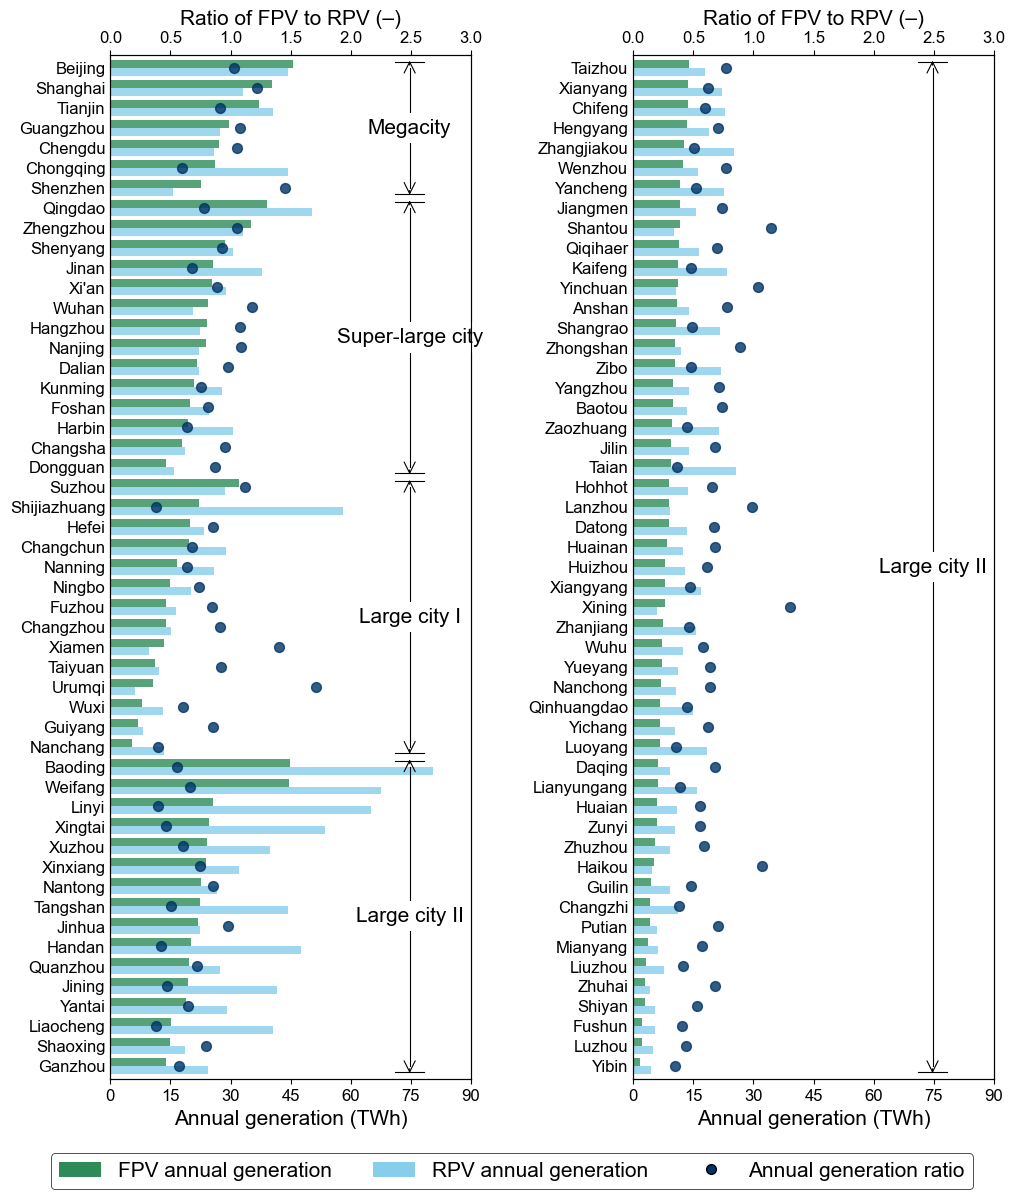

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = ['#87CEEB', '#2E8B57']  # Blue, green corresponding to roof and facade (not used here)
color_ratio = '#003366'
lw_axis = 0.8

# ----------------- Data Preparation -----------------
# df_plot index is city name, including:
#   city_level, Area_facade-0(km2), Area_roof-0(km2)
df_vis = df_plot.copy()
df_vis = df_vis.rename(index={
    'Haerbin': 'Harbin',
    'Huhehaote': 'Hohhot',
    'Wulumuqi': 'Urumqi',
    'Xian': "Xi'an"
})

# 1) Sort by city_level (descending) and facade_power (descending)
df_vis.sort_values(
    by=['city_level', 'facade_power'],
    ascending=[False, False],
    inplace=True
)

# 2) Split the cities into two parts
n = len(df_vis)
mid = n // 2
df_vis_part1 = df_vis.iloc[:mid]
df_vis_part2 = df_vis.iloc[mid:]

# Define a mapping dictionary for city levels (example, can be modified/expanded)
level_labels = {
    3: 'Megacity',
    2: 'Super-large city',
    1: 'Large city I',
    0: 'Large city II'
}

# ----------------- Create Canvas and Subplots -----------------
font_options = {'family': 'Arial', 'size': fs-12}
plt.rc('font', **font_options)

fig, axes = plt.subplots(
    1, 2,
    figsize=np.array([figwidth, figwidth * 1.2]) / 2.54,
)

parts = [df_vis_part1, df_vis_part2]

for i_ax, df_part in enumerate(parts):
    ax = axes[i_ax]

    # Construct a temporary table temp_part, keeping city_level for later labeling
    temp_part = df_part[['city_level', 'facade_power', 'roof_power', 'facade_roof_ratio_generation']].copy()
    # Only two columns (facade power and roof power) for actual plotting
    df_plot_part = temp_part[['facade_power', 'roof_power']]

    # Plot horizontal bar chart
    df_plot_part.plot(
        kind='barh',
        ax=ax,
        stacked=False,
        width=0.8,
        edgecolor='none',
        linewidth=lw_axis,
        alpha=0.8,
        color=colors[::-1],  # Facade, Roof
        legend=False,
    )

    # Reverse y-axis for ascending order from top to bottom
    ax.invert_yaxis()

    ax.set_xlim(0, 90)
    ax.set_xticks(np.arange(0, 100, 15))
    ax.yaxis.set_tick_params(length=0)
    ax.set_xlabel("Annual generation (TWh)", fontsize=fs-9)
    ax.set_ylabel(None)

    # -------------- Labeling City Level --------------
    # Reset index to match row_idx with the y-axis order of barh
    temp_part.reset_index(inplace=True)       # Turn city names into a column
    temp_part['row_idx'] = temp_part.index    # Row index for y-axis in barh

    # Group by city_level, find the min and max row indices for each group on the y-axis
    grouped = temp_part.groupby('city_level')['row_idx']
    for lvl, rows in grouped:
        min_idx = rows.min()
        max_idx = rows.max()
        mid_idx = 0.5 * (min_idx + max_idx)  # Vertical middle

        # x_pos: offset from the far-right of the largest bar, used for drawing arrows and text
        x_pos = ax.get_xlim()[-1] * 0.83
        # Arrow length
        arrow_len = 0.5
        h_len = ax.get_xlim()[-1] * 0.04  # Half-length of horizontal line (example value)

        # (1) Top arrow
        ax.annotate(
            '',
            xy=(x_pos, min_idx),
            xytext=(x_pos, min_idx - arrow_len),
            arrowprops=dict(arrowstyle='<-', lw=lw_axis, color='black', mutation_scale=20),  # Larger value makes the arrow bigger
            annotation_clip=False,
            transform=ax.transData,
        )
        ax.plot(
            [x_pos - h_len, x_pos + h_len],  # Left and right endpoints
            [min_idx-0.3, min_idx-0.3],              # Same y-value
            color='black',
            lw=lw_axis,
            transform=ax.transData,
            clip_on=False
        )

        # (2) Vertical line
        ax.plot(
            [x_pos, x_pos], 
            [min_idx, max_idx],
            color='black', lw=lw_axis,
            transform=ax.transData,
            clip_on=False
        )

        # (3) Bottom arrow
        ax.annotate(
            '',
            xy=(x_pos, max_idx),
            xytext=(x_pos, max_idx + arrow_len),
            arrowprops=dict(arrowstyle='<-', lw=lw_axis, color='black', mutation_scale=20),
            annotation_clip=False,
            transform=ax.transData
        )
        ax.plot(
            [x_pos - h_len, x_pos + h_len],
            [max_idx+0.3, max_idx+0.3],
            color='black',
            lw=lw_axis,
            transform=ax.transData,
            clip_on=False
        )

        # (4) Add text at the midpoint of the vertical line
        text_label = level_labels.get(lvl, f'Level {lvl}')
        ax.text(
            x_pos, mid_idx,
            text_label,
            ha='center', va='center',
            fontsize=fs-9,
            transform=ax.transData,
            bbox=dict(
                facecolor='white',         # Background color
                edgecolor='none'           # Remove border
            )
        )

    # -------------- Plot Ratio Scatter on the Same Subplot with ax.twiny() --------------
    # Create a new x-axis with a shared y-axis
    ax2 = ax.twiny()
    
    # y-values correspond to barh, need to use row_idx
    y_vals = temp_part['row_idx']
    # x-values are the ratio of FPV to RPV
    x_vals = temp_part['facade_roof_ratio_generation']
    
    # Plot scatter plot
    ax2.scatter(x_vals, y_vals, color=color_ratio, s=50,
            alpha=0.8, marker='o')
    
    # Set x-axis labels, limits, ticks, etc.
    ax2.set_xlim(0, 3)
    ax2.set_xticks(np.arange(0, 3.5, 0.5))
    ax2.set_xlabel("Ratio of FPV to RPV (\u2013)", fontsize=fs-9)
    
    # Ensure y-axis range matches ax
    ax2.set_ylim(ax.get_ylim())

# ----------------- Add Unified Legend -----------------
lg = fig.legend(
    handles=[
        mpatches.Patch(fc=colors[1], label='FPV annual generation'),  # Green
        mpatches.Patch(fc=colors[0], label='RPV annual generation'),    # Blue
        plt.Line2D([0], [0], marker='o', color='none', markerfacecolor=color_ratio,
                   markersize=7, label='Annual generation ratio')  # Dark blue circle
    ],
    handleheight=0.7,  # Default value 0.7
    handlelength=2,  # Default value 2
    loc='lower center',
    ncol=3,
    fontsize=fs - 9,
    bbox_to_anchor=(0.5, 0.00)  # Legend placed below the entire figure
)
frame = lg.get_frame()
frame.set_linewidth(0.6)
frame.set_edgecolor('black')
frame.set_facecolor('none')

# ----------------- Adjust Layout and Save -----------------
# Adjust subplot layout
plt.subplots_adjust(left=0.10, right=0.98, bottom=0.1, top=0.95,
		wspace=0.45, hspace=0
        )

# plt.savefig('fig2_Appendix2(b)_Generation_Relationship.svg', dpi=500)

plt.show()

## Subfigure (d) Annual Generation Boxplot

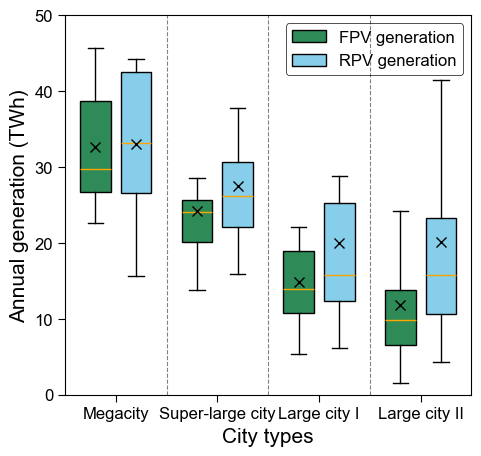

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = ['#87CEEB', '#2E8B57']  # Blue, green corresponding to roof and facade (not used here)
color_ratio = '#003366'
lw_axis = 0.8
lw_box = 1.0

# ---------------- Custom City Level Labels ----------------
level_labels = {
    3: 'Megacity',
    2: 'Super-large city',
    1: 'Large city I',
    0: 'Large city II'
}

# Map city level to category names and sort in descending order
df_plot['city_level_label'] = df_plot['city_level'].map(level_labels)
ordered_labels = [level_labels[i] for i in sorted(level_labels.keys(), reverse=True)]

# ----------------- Organize Data -----------------
# df_plot contains:
#   - city_level_label (for grouping)
#   - 'Area_facade-0(km2)' (Facade)
#   - 'Area_roof-0(km2)'   (Roof)
# We need to extract Facade/Roof data for each city_level_label

# For easier plotting, loop through ordered_labels
facade_data = []
roof_data = []
for label in ordered_labels:
    df_sub = df_plot[df_plot['city_level_label'] == label]
    # Facade and Roof values
    facade_vals = df_sub['facade_power'].dropna().values
    roof_vals = df_sub['roof_power'].dropna().values
    facade_data.append(facade_vals)
    roof_data.append(roof_vals)

# ----------------- Create Plot -----------------
font_options = {'family': 'Arial', 'size': fs - 12}
plt.rc('font', **font_options)

fig, ax = plt.subplots(figsize=np.array([figwidth * 0.5, figwidth * 0.5 * 0.9]) / 2.54)  # Figure size in inches

# Center positions for each city level on the x-axis
x_positions = np.arange(len(ordered_labels))

# Offsets for Facade and Roof in the same group
offset_facade = -0.2
offset_roof   = +0.2

# Common parameters for the boxplot
common_props = dict(
    showfliers=False,  # Do not show outliers
    patch_artist=True, # Allow box filling
    showmeans=True,    # Show mean point
    widths=0.3,        # Box width
    medianprops=dict(color='orange', linewidth=lw_box),  # Median line style
    # boxprops=dict(edgecolor='black', linewidth=lw_box),  # Box border
    # whiskerprops=dict(color='black', linewidth=lw_box),  # Whisker line
    # capprops=dict(color='black', linewidth=lw_box),  # Cap line
    meanprops=dict(marker='x', markerfacecolor='black',
        markeredgecolor='black', markersize=7, linewidth=lw_axis),
)

# Colors for Facade and Roof
color_facade = colors[-1]
color_roof   = colors[0]

# --------------- Draw Facade and Roof ---------------
# 1) Facade
for i, data_vals in enumerate(facade_data):
    # Plot boxplot at x_positions[i] + offset_facade
    bp = ax.boxplot(
        [data_vals],            # boxplot needs an iterable; here we only use data for one group
        positions=[x_positions[i] + offset_facade],
        **common_props
    )
    # Fill the boxes with color
    for box in bp['boxes']:
        box.set_facecolor(color_facade)

# 2) Roof
for i, data_vals in enumerate(roof_data):
    bp = ax.boxplot(
        [data_vals],
        positions=[x_positions[i] + offset_roof],
        **common_props
    )
    for box in bp['boxes']:
        box.set_facecolor(color_roof)

# ----------------- Draw Vertical Guides -----------------
# Draw vertical guide lines between each group to help distinguish city types
# Since x-axis ticks are 0,1,2,..., the boundaries between groups can be drawn at x = i - 0.5 (i=1,2,...)
for i in range(1, len(ordered_labels)):
    ax.axvline(x=i - 0.5, color='grey', linestyle='--', linewidth=lw_axis)

# ----------------- Axis and Legend Settings -----------------
# Place x-axis ticks in the center of each group
ax.set_xticks(np.arange(len(ordered_labels)))
ax.set_xticklabels(ordered_labels)

# Adjust y-axis limits and ticks (based on your data)
ax.set_xlim(-0.5, len(ordered_labels)-0.5)
ax.set_ylim(0, 50)
ax.set_yticks(np.arange(0, 60, 10))
ax.set_ylabel("Annual generation (TWh)", fontsize=fs - 9)
ax.set_xlabel("City types", fontsize=fs - 9)

# Axis appearance
ax.tick_params(axis='both', which='major', length=5, width=lw_axis, color='black')
for spine in ax.spines.values():
    spine.set_linewidth(lw_axis)
    spine.set_color('black')

# Manually create the legend
import matplotlib.patches as mpatches
patch_facade = mpatches.Patch(facecolor=color_facade, edgecolor='black', label='FPV generation')
patch_roof   = mpatches.Patch(facecolor=color_roof, edgecolor='black', label='RPV generation')
lg = ax.legend(handles=[patch_facade, patch_roof],
               fontsize=fs - 12, loc='upper right')
lg.get_frame().set_linewidth(0.6)
lg.get_frame().set_edgecolor('black')
lg.get_frame().set_facecolor('none')

# ----------------- Adjust Layout and Save -----------------
# Adjust subplot layout
plt.subplots_adjust(left=0.17, right=0.98, bottom=0.12, top=0.96,
		wspace=0.45, hspace=0
        )

# plt.savefig('fig2_Appendix2(d)_Generation_Boxplot.svg', dpi=500)

plt.show()

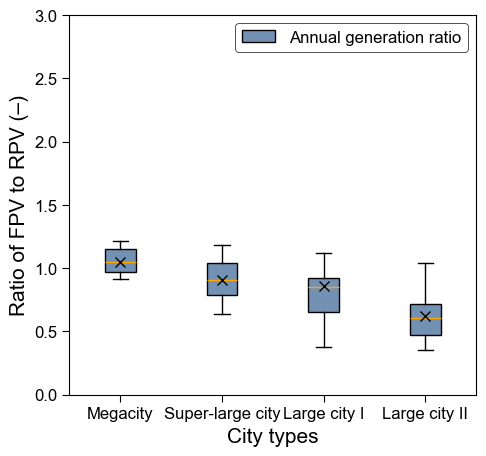

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = ['#87CEEB', '#2E8B57']  # Blue, Green corresponding to Roof and Facade (not used here)
color_ratio = '#7391B2'  #'#003366'
lw_axis = 0.8
lw_box = 1.0

# ---------------- Custom City Level Labels ----------------
level_labels = {
    3: 'Megacity',
    2: 'Super-large city',
    1: 'Large city I',
    0: 'Large city II'
}

# Map city level to category names and sort in descending order
df_plot['city_level_label'] = df_plot['city_level'].map(level_labels)
ordered_labels = [level_labels[i] for i in sorted(level_labels.keys(), reverse=True)]

# ----------------- Organize Data -----------------
# Extract facade_roof_ratio_area values for each city_level_label
ratio_data = []
for label in ordered_labels:
    df_sub = df_plot[df_plot['city_level_label'] == label]
    ratio_vals = df_sub['facade_roof_ratio_generation'].dropna().values
    ratio_data.append(ratio_vals)

# ----------------- Create Plot -----------------
font_options = {'family': 'Arial', 'size': fs - 12}
plt.rc('font', **font_options)

fig, ax = plt.subplots(figsize=np.array([figwidth * 0.5, figwidth * 0.5 * 0.9]) / 2.54)  # Figure size in inches

# Center positions for each city level on the x-axis
x_positions = np.arange(len(ordered_labels))

# ----------------- Draw Boxplot -----------------
common_props = dict(
    showfliers=False,             # Do not show outliers
    patch_artist=True,            # Allow box fill
    showmeans=True,
    widths=0.3,                   # Box width
    medianprops=dict(color='orange', linewidth=lw_box),  # Median line style
    meanprops=dict(marker='x', markerfacecolor='black',
            markeredgecolor='black', markersize=7, linewidth=lw_axis),
)

bp = ax.boxplot(
    ratio_data,
    positions=x_positions,
    **common_props
)
# Fill boxes with color
for box in bp['boxes']:
    box.set_facecolor(color_ratio)
    # box.set_alpha(0.5)

# ----------------- Axis and Legend Settings -----------------
ax.set_xticks(x_positions)
ax.set_xticklabels(ordered_labels)
# Adjust y-axis limits based on the actual data; example range is set here
ax.set_xlim(-0.5, len(ordered_labels)-0.5)
ax.set_ylim(0, 3)
ax.set_yticks(np.arange(0, 3.1, 0.5))
ax.set_ylabel("Ratio of FPV to RPV (\u2013)", fontsize=fs - 9)
ax.set_xlabel("City types", fontsize=fs - 9)

ax.tick_params(axis='both', which='major', length=5, width=lw_axis, color='black')
for spine in ax.spines.values():
    spine.set_linewidth(lw_axis)
    spine.set_color('black')

# Manually create the legend
patch_ratio = mpatches.Patch(facecolor=color_ratio, edgecolor='black', label='Annual generation ratio')
lg = ax.legend(handles=[patch_ratio], fontsize=fs - 12, loc='upper right')
lg.get_frame().set_linewidth(0.6)
lg.get_frame().set_edgecolor('black')
lg.get_frame().set_facecolor('none')

# ----------------- Adjust Layout and Save -----------------
plt.subplots_adjust(left=0.17, right=0.98, bottom=0.12, top=0.96,
		# wspace=0.45, hspace=0
        )

# plt.savefig('fig2_Appendix2(d)_Generation_Ratio.svg', dpi=500)

plt.show()

# Bottom